# Business Objective:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

As a part of this project, we need to identify customers at high risk of churn and identify the main indicators of churn.

### Assumption on Evaluation Metric:
*As it is more important to identify churners than the non-churners accurately, we have chosen **Recall** metric to evaluate a model.*

In [1]:
#Supress Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

%matplotlib inline

In [3]:
#Data Import
missing_values = ['N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan','null']
telecom_df = pd.read_csv('./telecom_churn_data.csv', encoding='utf-8', na_values=missing_values)
telecom_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
telecom_df.shape

(99999, 226)

In [5]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
telecom_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [7]:
# Recharge columns in the chrun dataset
rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
             'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','last_day_rch_amt_9'
                 ]

telecom_df[rech_cols].describe(include='all')

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  total_rech_amt_6  total_rech_amt_7  \
count       25922.000000      99999.000000      99999.000000   
mean            2.441170        327.514615        322.962970   
std             2.516339        398.019701        408.114237   
min             1.000000          0.000000          0.000000   
25%             1.000000        109.000000        100.000000   
50%             2.000000        230.000000        220.000000   
75%             3.000000        437.500000        428.000000   
max            84.000000      35190.000000      40335.000000   

       total_rech_amt_8  total_rech_amt_9  count_rech_2g_6  count_rech_2g_7  \
count      99999.000000      99999.000000     25153.000000     25571.000000   
mean         324.157122        303.345673         1.864668         2.044699   
std          416.540455        404.588583         2.570254         2.768332   
min            0.000000          0.000000         0.000000         0.000000   
25%           90.000000         52.000000         1.000000         1.000000   
50%          225.000000        200.000000         1.000000         1.000000   
75%          434.500000        415.000000         2.000000         2.000000   
max        45320.000000      37235.000000        42.000000        48.000000   

       count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  \
count     26339.000000     25922.000000     25153.000000     25571.000000   
mean          2.016288         1.781807         0.599133         0.621720   
std           2.720132         2.214701         1.274428         1.394524   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         1.000000         0.000000         0.000000   
50%           1.000000         1.000000         0.000000         0.000000   
75%           2.000000         2.000000         1.000000         1.000000   
max          44.000000        40.000000        29.000000        35.000000   

       count_rech_3g_8  count_rech_3g_9  max_rech_data_6  max_rech_data_7  \
count     26339.000000     25922.000000     25153.000000     25571.000000   
mean          0.635711         0.659363       126.393392       126.729459   
std           1.422827         1.411513       108.477235       109.765267   
min           0.000000         0.000000         1.000000         1.000000   
25%           0.000000         0.000000        25.000000        25.000000   
50%           0.000000         0.000000       145.000000       145.000000   
75%           1.000000         1.000000       177.000000       177.000000   
max          45.000000        49.000000      1555.000000      1555.000000   

       max_rech_data_8  max_rech_data_9  max_rech_amt_6  max_rech_amt_7  \
count     26339.000000      25922.00000    99999.000000    99999.000000   
mean        125.717301        124.94144      104.637486      104.752398   
std         109.437851        111.36376      120.614894      124.523970   
min           1.000000          1.00000        0.000000        0.000000   
25%          25.000000         25.00000       30.000000       30.000000   
50%         145.000000        145.00000      110.000000      110.000000   
75%         179.000000        179.00000      120.000000      128.000000   
max        1555.000000       1555.00000     4010.000000     4010.000000   

       max_rech_amt_8  max_rech_amt_9  av_rech_amt_data_6  

In [8]:
telecom_df.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [9]:
#Checking for datatypes and if needed convert the datatypes

#Non Numeric
non_numeric = telecom_df[list(telecom_df.dtypes[telecom_df.dtypes=='object'].index)].head()
non_numeric.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

 Insights - I see that below columns are imported as object datatype. 

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']
 
 I will convert them in Data Cleaning phase.

In [10]:
#Numeric
numeric = telecom_df[list(telecom_df.dtypes[telecom_df.dtypes!='object'].index)].head()
numeric.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=214)

In [11]:
#backup

churn_df = telecom_df.copy()
churn_df.shape

(99999, 226)

## Data Cleaning

In [12]:
#Lets first check missing values in columns and rows in our dataset.

#Define a function to check missing values in a dataset
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (100 *(data.isnull().sum()/data.isnull().count())).sort_values(ascending=False)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [13]:
missing_data(telecom_df)

Total    Percent
count_rech_2g_6           74846  74.846748
date_of_last_rech_data_6  74846  74.846748
count_rech_3g_6           74846  74.846748
av_rech_amt_data_6        74846  74.846748
max_rech_data_6           74846  74.846748
total_rech_data_6         74846  74.846748
arpu_3g_6                 74846  74.846748
arpu_2g_6                 74846  74.846748
night_pck_user_6          74846  74.846748
fb_user_6                 74846  74.846748
arpu_3g_7                 74428  74.428744
count_rech_2g_7           74428  74.428744
fb_user_7                 74428  74.428744
count_rech_3g_7           74428  74.428744
arpu_2g_7                 74428  74.428744
av_rech_amt_data_7        74428  74.428744
max_rech_data_7           74428  74.428744
night_pck_user_7          74428  74.428744
total_rech_data_7         74428  74.428744
date_of_last_rech_data_7  74428  74.428744
night_pck_user_9          74077  74.077741
date_of_last_rech_data_9  74077  74.077741
fb_user_9                 74077  74.077741
arpu_2g_9                 74077  74.077741
max_rech_data_9           74077  74.077741
arpu_3g_9                 74077  74.077741
total_rech_data_9         74077  74.077741
av_rech_amt_data_9        74077  74.077741
count_rech_3g_9           74077  74.077741
count_rech_2g_9           74077  74.077741
fb_user_8                 73660  73.660737
av_rech_amt_data_8        73660  73.660737
count_rech_3g_8           73660  73.660737
count_rech_2g_8           73660  73.660737
date_of_last_rech_data_8  73660  73.660737
total_rech_data_8         73660  73.660737
max_rech_data_8           73660  73.660737
arpu_3g_8                 73660  73.660737
arpu_2g_8                 73660  73.660737
night_pck_user_8          73660  73.660737
std_ic_t2m_mou_9           7745   7.745077
spl_ic_mou_9               7745   7.745077
loc_ic_mou_9               7745   7.745077
isd_ic_mou_9               7745   7.745077
std_ic_t2o_mou_9           7745   7.745077
loc_ic_t2f_mou_9           7745   7.745077
ic_others_9                7745   7.745077
loc_og_t2f_mou_9           7745   7.745077
loc_ic_t2m_mou_9           7745   7.745077
loc_og_t2c_mou_9           7745   7.745077
loc_og_t2m_mou_9           7745   7.745077
loc_ic_t2t_mou_9           7745   7.745077
loc_og_t2t_mou_9           7745   7.745077
std_ic_mou_9               7745   7.745077
std_og_t2t_mou_9           7745   7.745077
roam_og_mou_9              7745   7.745077
std_ic_t2t_mou_9           7745   7.745077
std_ic_t2f_mou_9           7745   7.745077
loc_og_mou_9               7745   7.745077
offnet_mou_9               7745   7.745077
std_og_t2m_mou_9           7745   7.745077
std_og_t2f_mou_9           7745   7.745077
std_og_t2c_mou_9           7745   7.745077
isd_og_mou_9               7745   7.745077
onnet_mou_9                7745   7.745077
std_og_mou_9               7745   7.745077
spl_og_mou_9               7745   7.745077
og_others_9                7745   7.745077
roam_ic_mou_9              7745   7.745077
std_ic_t2t_mou_8           5378   5.378054
offnet_mou_8               5378   5.378054
ic_others_8                5378   5.378054
isd_ic_mou_8               5378   5.378054
loc_ic_mou_8               5378   5.378054
std_og_t2c_mou_8           5378   5.378054
spl_ic_mou_8               5378   5.378054
og_others_8                5378   5.378054
loc_ic_t2f_mou_8           5378   5.378054
std_og_t2f_mou_8           5378   5.378054
loc_og_mou_8               5378   5.378054
std_ic_mou_8               5378   5.378054
std_ic_t2m_mou_8           5378   5.378054
std_og_t2m_mou_8           5378   5.378054
std_ic_t2o_mou_8           5378   5.378054
loc_og_t2c_mou_8           5378   5.378054
std_og_mou_8               5378   5.378054
std_ic_t2f_mou_8           5378   5.378054
roam_ic_mou_8              5378   5.378054
loc_og_t2t_mou_8           5378   5.378054
loc_ic_t2t_mou_8           5378   5.378054
roam_og_mou_8              5378   5.378054
onnet_mou_8                5378   5.378054
std_og_t2t_mou_8           

In [14]:
#Lets see how many columns have more than 70% missing data

NA_col_70 = telecom_df.isnull().sum().sort_values()
#Lets see how many columns has more than 70% missing values.
NA_col_70 = NA_col_70[NA_col_70.values >= (0.7*len(churn_df))]
print(NA_col_70)

night_pck_user_8            73660
arpu_2g_8                   73660
arpu_3g_8                   73660
max_rech_data_8             73660
total_rech_data_8           73660
date_of_last_rech_data_8    73660
count_rech_2g_8             73660
count_rech_3g_8             73660
av_rech_amt_data_8          73660
fb_user_8                   73660
count_rech_2g_9             74077
count_rech_3g_9             74077
av_rech_amt_data_9          74077
total_rech_data_9           74077
arpu_3g_9                   74077
max_rech_data_9             74077
arpu_2g_9                   74077
fb_user_9                   74077
date_of_last_rech_data_9    74077
night_pck_user_9            74077
date_of_last_rech_data_7    74428
total_rech_data_7           74428
night_pck_user_7            74428
max_rech_data_7             74428
av_rech_amt_data_7          74428
arpu_2g_7                   74428
count_rech_3g_7             74428
fb_user_7                   74428
count_rech_2g_7             74428
arpu_3g_7     

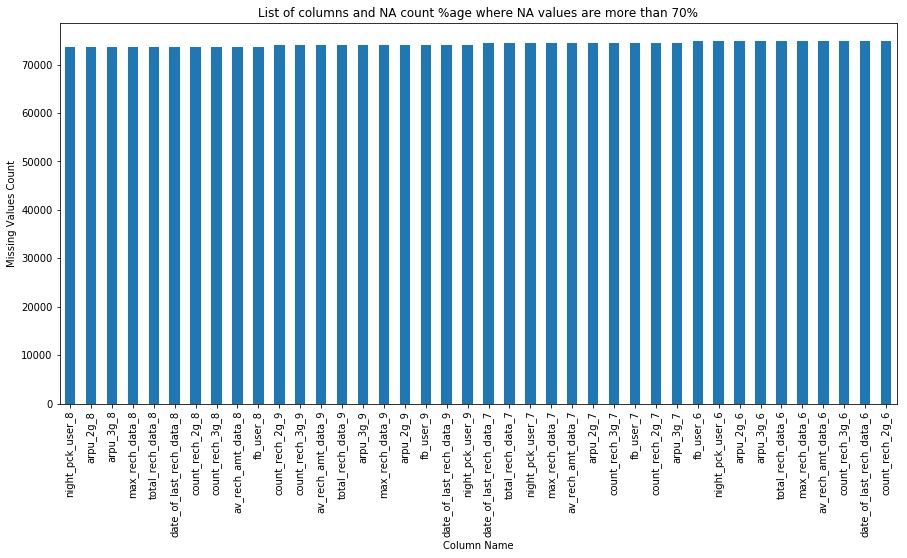

In [15]:
#Plot NA count for columns having more than 70% missing values
plt.figure(figsize=(15,7))
NA_col_70.plot(kind='bar')
plt.title('List of columns and NA count %age where NA values are more than 70%')
plt.xlabel("Column Name")
plt.ylabel("Missing Values Count")
plt.show()

In [16]:
#Checking out rows with more than 50% or 30% missing values
#Lets check and drop records having more than 30% missing data. As they will not be able to provide a useful insight.
NA_row = (100*(telecom_df.transpose().isnull().sum()/(telecom_df.shape[1]))).sort_values(ascending=False)
print(NA_row[NA_row.values > (0.5 * len(churn_df))])
print(NA_row[NA_row.values > (0.3 * len(churn_df))])

Series([], dtype: float64)
Series([], dtype: float64)


In [17]:
#Insights - There is no row with more than 50% or 30% missing data.

In [18]:
#Lets first see if there is any column with no/less variance

col_vd_1val = telecom_df.loc[:,telecom_df.nunique()==1].columns.to_list()
col_vd_1val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [19]:
#Drop above 16 columns
telecom_df.drop(col_vd_1val, axis=1, inplace=True)
telecom_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [20]:
#Lets now convert data types of date fields which we had found in Data Exploration Phase.
date_col = telecom_df.select_dtypes(include='object').columns.to_list()
for col in date_col:
    telecom_df[col]=pd.to_datetime(telecom_df[col])
telecom_df.dtypes

mobile_number                        int64
arpu_6                             float64
arpu_7                             float64
arpu_8                             float64
arpu_9                             float64
onnet_mou_6                        float64
onnet_mou_7                        float64
onnet_mou_8                        float64
onnet_mou_9                        float64
offnet_mou_6                       float64
offnet_mou_7                       float64
offnet_mou_8                       float64
offnet_mou_9                       float64
roam_ic_mou_6                      float64
roam_ic_mou_7                      float64
roam_ic_mou_8                      float64
roam_ic_mou_9                      float64
roam_og_mou_6                      float64
roam_og_mou_7                      float64
roam_og_mou_8                      float64
roam_og_mou_9                      float64
loc_og_t2t_mou_6                   float64
loc_og_t2t_mou_7                   float64
loc_og_t2t_

In [21]:
#Lets now explore the data of 6th month

#Month _6
telecom_df[['total_rech_num_6','total_rech_amt_6','total_rech_data_6','av_rech_amt_data_6','max_rech_data_6','arpu_6','vol_3g_mb_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6']].head(10)

total_rech_num_6  total_rech_amt_6  total_rech_data_6  av_rech_amt_data_6  \
0                 4               362                1.0               252.0   
1                 4                74                NaN                 NaN   
2                 5               168                NaN                 NaN   
3                10               230                NaN                 NaN   
4                 5               196                1.0                56.0   
5                 2               120                NaN                 NaN   
6                15               499                NaN                 NaN   
7                 5              1580                NaN                 NaN   
8                19               437                NaN                 NaN   
9                 4               220                NaN                 NaN   

   max_rech_data_6    arpu_6  vol_3g_mb_6  monthly_2g_6  sachet_2g_6  \
0            252.0   197.385        83.57             0            0   
1              NaN    34.047         0.00             0            0   
2              NaN   167.690         0.00             0            0   
3              NaN   221.338         0.00             0            0   
4             56.0   261.636         0.00             0            1   
5              NaN    50.258         0.00             0            0   
6              NaN   429.023         0.00             0            0   
7              NaN  1069.180         0.00             0            0   
8              NaN   378.721         0.00             0            0   
9              NaN   119.518         0.00             0            0   

   monthly_3g_6  sachet_3g_6  
0             1            0  
1             0            0  
2             0            0  
3             0            0  
4             0            0  
5             0            0  
6             0            0  
7             0            0  
8             0            0  
9             0            0

In [22]:
#Month _7
telecom_df[['total_rech_num_7','total_rech_amt_7','total_rech_data_7','av_rech_amt_data_7','max_rech_data_7','arpu_7','vol_3g_mb_7','monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7']].head(10)

total_rech_num_7  total_rech_amt_7  total_rech_data_7  av_rech_amt_data_7  \
0                 3               252                1.0               252.0   
1                 9               384                1.0               154.0   
2                 4               315                NaN                 NaN   
3                11               310                NaN                 NaN   
4                 6               350                NaN                 NaN   
5                 2                 0                NaN                 NaN   
6                10               222                NaN                 NaN   
7                 5               790                NaN                 NaN   
8                21               601                2.0               177.0   
9                 2               195                1.0               154.0   

   max_rech_data_7    arpu_7  vol_3g_mb_7  monthly_2g_7  sachet_2g_7  \
0            252.0   214.816       150.76             0            0   
1            154.0   355.074         0.00             1            0   
2              NaN   189.058         0.00             0            0   
3              NaN   251.102         0.00             0            0   
4              NaN   309.876         0.00             0            0   
5              NaN    58.810         0.00             0            0   
6              NaN   190.704         0.00             0            0   
7              NaN  1349.850         0.00             0            0   
8            154.0   492.223       750.95             1            1   
9            154.0   247.435         0.00             1            0   

   monthly_3g_7  sachet_3g_7  
0             1            0  
1             0            0  
2             0            0  
3             0            0  
4             0            0  
5             0            0  
6             0            0  
7             0            0  
8             0            0  
9             0            0

In [23]:
#Month _8
telecom_df[['total_rech_num_8','total_rech_amt_8','total_rech_data_8','av_rech_amt_data_8','max_rech_data_8','arpu_8','vol_3g_mb_8','monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8']].head(10)

total_rech_num_8  total_rech_amt_8  total_rech_data_8  av_rech_amt_data_8  \
0                 2               252                1.0               252.0   
1                11               283                2.0                50.0   
2                 2               116                NaN                 NaN   
3                18               601                NaN                 NaN   
4                 3               287                NaN                 NaN   
5                 3               130                NaN                 NaN   
6                11               294                NaN                 NaN   
7                 7              3638                NaN                 NaN   
8                14               120                3.0                69.0   
9                 5               210                NaN                 NaN   

   max_rech_data_8    arpu_8  vol_3g_mb_8  monthly_2g_8  sachet_2g_8  \
0            252.0   213.803       109.61             0            0   
1             25.0   268.321         0.00             0            2   
2              NaN   210.226         0.00             0            0   
3              NaN   508.054         0.00             0            0   
4              NaN   238.174         0.00             0            0   
5              NaN    83.386         0.00             0            0   
6              NaN   255.114         0.00             0            0   
7              NaN  3171.480         0.00             0            0   
8             23.0   137.362        11.94             0            3   
9              NaN   170.231         0.00             0            0   

   monthly_3g_8  sachet_3g_8  
0             1            0  
1             0            0  
2             0            0  
3             0            0  
4             0            0  
5             0            0  
6             0            0  
7             0            0  
8             0            0  
9             0            0

In [24]:
#Month _9
telecom_df[['total_rech_num_9','total_rech_amt_9','total_rech_data_9','av_rech_amt_data_9','max_rech_data_9','arpu_9','vol_3g_mb_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9']].head(10)

total_rech_num_9  total_rech_amt_9  total_rech_data_9  av_rech_amt_data_9  \
0                 6                 0                NaN                 NaN   
1                 5               121                NaN                 NaN   
2                 7               358                1.0                46.0   
3                14               410                NaN                 NaN   
4                 4               200                NaN                 NaN   
5                 3               130                NaN                 NaN   
6                 7               141                NaN                 NaN   
7                 3                 0                NaN                 NaN   
8                15               186                NaN                 NaN   
9                 3               180                NaN                 NaN   

   max_rech_data_9   arpu_9  vol_3g_mb_9  monthly_2g_9  sachet_2g_9  \
0              NaN   21.100         0.00             0            0   
1              NaN   86.285         0.00             0            0   
2             46.0  290.714         8.42             0            1   
3              NaN  389.500         0.00             0            0   
4              NaN  163.426         0.00             0            0   
5              NaN  170.826         0.00             0            0   
6              NaN  114.751         0.00             0            0   
7              NaN  500.000         0.00             0            0   
8              NaN  166.787         0.00             0            0   
9              NaN  160.042         0.00             0            0   

   monthly_3g_9  sachet_3g_9  
0             0            0  
1             0            0  
2             0            0  
3             0            0  
4             0            0  
5             0            0  
6             0            0  
7             0            0  
8             0            0  
9             0            0

By looking at data, I see that total_rech_data_* , av_rech_amt_data_* , max_rech_data_***** fields are missing when customers have not purchased any 2g or 3g service.

#Lets check the same thing for entire dataset.

In [25]:
#If above insight is true in that case below consitions should hold true:
# 1. total_rech_data_6, av_rech_amt_data_6 and  max_rech_data_6 should not be null 
#when we have not null value for even 1 field -  monthly_2g_6, monthly_3g_6, sachet_3g_6 and sachet_2g_6
# 2. total_rech_data_6, av_rech_amt_data_6 and  max_rech_data_6 should be NULL for all such records 
#where above fields values are null.


nonnull_rechg_data_6 = telecom_df.loc[(telecom_df['monthly_2g_6'] == 1) | (telecom_df['monthly_3g_6']==1) | (telecom_df['sachet_3g_6']==1) | (telecom_df['sachet_2g_6']==1)]['total_rech_data_6'].isnull().any()
null_rechg_data_6 = telecom_df.loc[(telecom_df['monthly_2g_6'] == 0) & (telecom_df['monthly_3g_6']==0) & (telecom_df['sachet_3g_6']==0) & (telecom_df['sachet_2g_6']==0)]['total_rech_data_6'].isnull().all()
if((nonnull_rechg_data_6==False) and (null_rechg_data_6==True)):
    print('Verified that total_rech_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that total_rech_data_6 is null only if any of the 2g or 3g service has been taken')
    

#Lets now check for av_rech_amt_data_6 
nonnull_av_rechg_amt_6 = telecom_df.loc[(telecom_df['monthly_2g_6'] == 1) | (telecom_df['monthly_3g_6']==1) | (telecom_df['sachet_3g_6']==1) | (telecom_df['sachet_2g_6']==1)]['av_rech_amt_data_6'].isnull().any()
null_av_rechg_amt_6 = telecom_df.loc[(telecom_df['monthly_2g_6'] == 0) & (telecom_df['monthly_3g_6']==0) & (telecom_df['sachet_3g_6']==0) & (telecom_df['sachet_2g_6']==0)]['av_rech_amt_data_6'].isnull().all()
if((nonnull_av_rechg_amt_6==False) and (null_av_rechg_amt_6==True)):
    print('Verified that av_rech_amt_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that av_rech_amt_data is null only if any of the 2g or 3g service has been taken')
    
    
#Check for max_rech_data_6
nonnull_max_rech_data_6 = telecom_df.loc[(telecom_df['monthly_2g_6'] == 1) | (telecom_df['monthly_3g_6']==1) | (telecom_df['sachet_3g_6']==1) | (telecom_df['sachet_2g_6']==1)]['max_rech_data_6'].isnull().any()
null_max_rech_data_6 = telecom_df.loc[(telecom_df['monthly_2g_6'] == 0) & (telecom_df['monthly_3g_6']==0) & (telecom_df['sachet_3g_6']==0) & (telecom_df['sachet_2g_6']==0)]['max_rech_data_6'].isnull().all()
if((nonnull_max_rech_data_6==False) and (null_max_rech_data_6==True)):
    print('Verified that max_rech_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that max_rech_data is null only if any of the 2g or 3g service has been taken')

Verified that total_rech_data is NULL if customer has not taken any 2g or 3g 
Verified that av_rech_amt_data is NULL if customer has not taken any 2g or 3g 
Verified that max_rech_data is NULL if customer has not taken any 2g or 3g 


In [26]:
#lets check the same for 7th month

nonnull_rechg_data_7 = telecom_df.loc[(telecom_df['monthly_2g_7'] == 1) | (telecom_df['monthly_3g_7']==1) | (telecom_df['sachet_3g_7']==1) | (telecom_df['sachet_2g_7']==1)]['total_rech_data_7'].isnull().any()
null_rechg_data_7 = telecom_df.loc[(telecom_df['monthly_2g_7'] == 0) & (telecom_df['monthly_3g_7']==0) & (telecom_df['sachet_3g_7']==0) & (telecom_df['sachet_2g_7']==0)]['total_rech_data_7'].isnull().all()
if((nonnull_rechg_data_7==False) and (null_rechg_data_7==True)):
    print('Verified that total_rech_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that total_rech_data is null only if any of the 2g or 3g service has been taken')
    

#Lets now check for av_rech_amt_data_7 
nonnull_av_rechg_amt_7 = telecom_df.loc[(telecom_df['monthly_2g_7'] == 1) | (telecom_df['monthly_3g_7']==1) | (telecom_df['sachet_3g_7']==1) | (telecom_df['sachet_2g_7']==1)]['av_rech_amt_data_7'].isnull().any()
null_av_rechg_amt_7 = telecom_df.loc[(telecom_df['monthly_2g_7'] == 0) & (telecom_df['monthly_3g_7']==0) & (telecom_df['sachet_3g_7']==0) & (telecom_df['sachet_2g_7']==0)]['av_rech_amt_data_7'].isnull().all()
if((nonnull_av_rechg_amt_7==False) and (null_av_rechg_amt_7==True)):
    print('Verified that av_rech_amt_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that av_rech_amt_data is null only if any of the 2g or 3g service has been taken')
    
    
#Check for max_rech_data_7
nonnull_max_rech_data_7 = telecom_df.loc[(telecom_df['monthly_2g_7'] == 1) | (telecom_df['monthly_3g_7']==1) | (telecom_df['sachet_3g_7']==1) | (telecom_df['sachet_2g_7']==1)]['max_rech_data_7'].isnull().any()
null_max_rech_data_7 = telecom_df.loc[(telecom_df['monthly_2g_7'] == 0) & (telecom_df['monthly_3g_7']==0) & (telecom_df['sachet_3g_7']==0) & (telecom_df['sachet_2g_7']==0)]['max_rech_data_7'].isnull().all()
if((nonnull_max_rech_data_7==False) and (null_max_rech_data_7==True)):
    print('Verified that max_rech_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that max_rech_data is null only if any of the 2g or 3g service has been taken')

Verified that total_rech_data is NULL if customer has not taken any 2g or 3g 
Verified that av_rech_amt_data is NULL if customer has not taken any 2g or 3g 
Verified that max_rech_data is NULL if customer has not taken any 2g or 3g 


In [27]:
#lets check the same for 8th month

nonnull_rechg_data_8 = telecom_df.loc[(telecom_df['monthly_2g_8'] == 1) | (telecom_df['monthly_3g_8']==1) | (telecom_df['sachet_3g_8']==1) | (telecom_df['sachet_2g_8']==1)]['total_rech_data_8'].isnull().any()
null_rechg_data_8 = telecom_df.loc[(telecom_df['monthly_2g_8'] == 0) & (telecom_df['monthly_3g_8']==0) & (telecom_df['sachet_3g_8']==0) & (telecom_df['sachet_2g_8']==0)]['total_rech_data_8'].isnull().all()
if((nonnull_rechg_data_8==False) and (null_rechg_data_8==True)):
    print('Verified that total_rech_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that total_rech_data is null only if any of the 2g or 3g service has been taken')
    

#Lets now check for av_rech_amt_data_8 
nonnull_av_rechg_amt_8 = telecom_df.loc[(telecom_df['monthly_2g_8'] == 1) | (telecom_df['monthly_3g_8']==1) | (telecom_df['sachet_3g_8']==1) | (telecom_df['sachet_2g_8']==1)]['av_rech_amt_data_8'].isnull().any()
null_av_rechg_amt_8 = telecom_df.loc[(telecom_df['monthly_2g_8'] == 0) & (telecom_df['monthly_3g_8']==0) & (telecom_df['sachet_3g_8']==0) & (telecom_df['sachet_2g_8']==0)]['av_rech_amt_data_8'].isnull().all()
if((nonnull_av_rechg_amt_8==False) and (null_av_rechg_amt_8==True)):
    print('Verified that av_rech_amt_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that av_rech_amt_data is null only if any of the 2g or 3g service has been taken')
    
    
#Check for max_rech_data_8
nonnull_max_rech_data_8 = telecom_df.loc[(telecom_df['monthly_2g_8'] == 1) | (telecom_df['monthly_3g_8']==1) | (telecom_df['sachet_3g_8']==1) | (telecom_df['sachet_2g_8']==1)]['max_rech_data_8'].isnull().any()
null_max_rech_data_8 = telecom_df.loc[(telecom_df['monthly_2g_8'] == 0) & (telecom_df['monthly_3g_8']==0) & (telecom_df['sachet_3g_8']==0) & (telecom_df['sachet_2g_8']==0)]['max_rech_data_8'].isnull().all()
if((nonnull_max_rech_data_8==False) and (null_max_rech_data_8==True)):
    print('Verified that max_rech_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that max_rech_data is null only if any of the 2g or 3g service has been taken')

Verified that total_rech_data is NULL if customer has not taken any 2g or 3g 
Verified that av_rech_amt_data is NULL if customer has not taken any 2g or 3g 
Verified that max_rech_data is NULL if customer has not taken any 2g or 3g 


In [28]:
#lets check the same for 9th month

nonnull_rechg_data_9 = telecom_df.loc[(telecom_df['monthly_2g_9'] == 1) | (telecom_df['monthly_3g_9']==1) | (telecom_df['sachet_3g_9']==1) | (telecom_df['sachet_2g_9']==1)]['total_rech_data_9'].isnull().any()
null_rechg_data_9 = telecom_df.loc[(telecom_df['monthly_2g_9'] == 0) & (telecom_df['monthly_3g_9']==0) & (telecom_df['sachet_3g_9']==0) & (telecom_df['sachet_2g_9']==0)]['total_rech_data_9'].isnull().all()
if((nonnull_rechg_data_9==False) and (null_rechg_data_9==True)):
    print('Verified that total_rech_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that total_rech_data is null only if any of the 2g or 3g service has been taken')
    

#Lets now check for av_rech_amt_data_9 
nonnull_av_rechg_amt_9 = telecom_df.loc[(telecom_df['monthly_2g_9'] == 1) | (telecom_df['monthly_3g_9']==1) | (telecom_df['sachet_3g_9']==1) | (telecom_df['sachet_2g_9']==1)]['av_rech_amt_data_9'].isnull().any()
null_av_rechg_amt_9 = telecom_df.loc[(telecom_df['monthly_2g_9'] == 0) & (telecom_df['monthly_3g_9']==0) & (telecom_df['sachet_3g_9']==0) & (telecom_df['sachet_2g_9']==0)]['av_rech_amt_data_9'].isnull().all()
if((nonnull_av_rechg_amt_9==False) and (null_av_rechg_amt_9==True)):
    print('Verified that av_rech_amt_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that av_rech_amt_data is null only if any of the 2g or 3g service has been taken')
    
    
#Check for max_rech_data_9
nonnull_max_rech_data_9 = telecom_df.loc[(telecom_df['monthly_2g_9'] == 1) | (telecom_df['monthly_3g_9']==1) | (telecom_df['sachet_3g_9']==1) | (telecom_df['sachet_2g_9']==1)]['max_rech_data_9'].isnull().any()
null_max_rech_data_9 = telecom_df.loc[(telecom_df['monthly_2g_9'] == 0) & (telecom_df['monthly_3g_9']==0) & (telecom_df['sachet_3g_9']==0) & (telecom_df['sachet_2g_9']==0)]['max_rech_data_9'].isnull().all()
if((nonnull_max_rech_data_9==False) and (null_max_rech_data_9==True)):
    print('Verified that max_rech_data is NULL if customer has not taken any 2g or 3g ')
else:
    print('Not able to verified that max_rech_data is null only if any of the 2g or 3g service has been taken')

Verified that total_rech_data is NULL if customer has not taken any 2g or 3g 
Verified that av_rech_amt_data is NULL if customer has not taken any 2g or 3g 
Verified that max_rech_data is NULL if customer has not taken any 2g or 3g 


Insights - As it has been proven that fields - total_rech_data_6, av_rech_amt_data_6 and  max_rech_data_6 have missing values only where customer didn't avail any 2g or 3g service.
That means we can fill these missing values with 0.

In [29]:
# create a list of recharge columns where we will impute missing values with zeroes
colsRech_impute= ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
telecom_df[colsRech_impute] = telecom_df[colsRech_impute].apply(lambda x: x.fillna(0))
telecom_df.shape

(99999, 210)

****Impute FB_USER and NIGHT_PCK****

According to the dictionary Night refers to the whether the user uses a night pack scheme or not
and FB user refers to the users who use the  service scheme to avail services of facebook and other networking sites.

Both of these fields are imported as float but they actually represent a category. So, lets also convert datatype and then try to impute them.

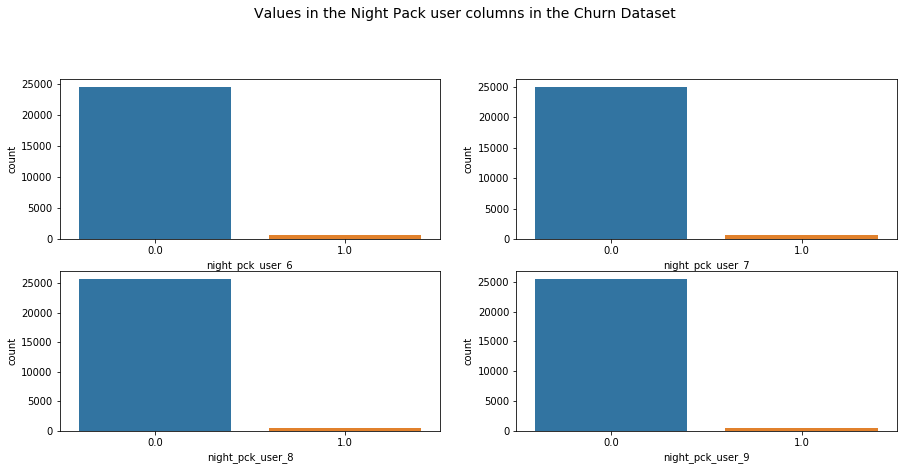

NaN    74846
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
NaN    74428
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
NaN    73660
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
NaN    74077
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64


In [30]:
fig=plt.figure(figsize=(15,10))
fig.suptitle("Values in the Night Pack user columns in the Churn Dataset", fontsize=14)
plt.subplot(321)
sns.countplot(telecom_df['night_pck_user_6'])
plt.subplot(322)
sns.countplot(telecom_df['night_pck_user_7'])
plt.subplot(323)
sns.countplot(telecom_df['night_pck_user_8'])
plt.subplot(324)
sns.countplot(telecom_df['night_pck_user_9'])
plt.show()

#Lets also check value count of each value
print(telecom_df['night_pck_user_6'].value_counts(dropna=False))
print(telecom_df['night_pck_user_7'].value_counts(dropna=False))
print(telecom_df['night_pck_user_8'].value_counts(dropna=False))
print(telecom_df['night_pck_user_9'].value_counts(dropna=False))

In [31]:
#Insights - It is clearly visible that NA count for each month is much higher than 0 and 1 count and 
#there is no other field which may help to impute these missing values
#and if I impute with any value between 1 or 0, may end uo biasing our data.
#So, I will create a new category 2 which implies there is no data available for these users. 
#


#Lets also see FB_USER values

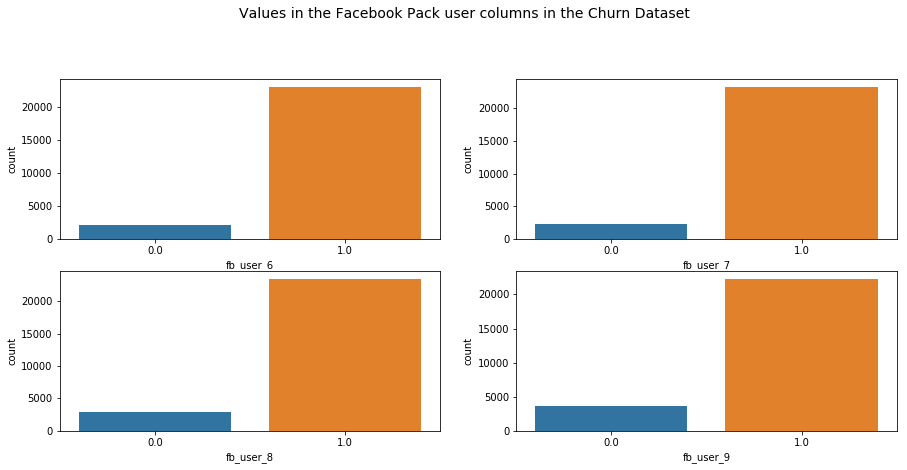

NaN    74846
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64
NaN    74428
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64
NaN    73660
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64
NaN    74077
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64


In [32]:
#FaceBook Pack
fig=plt.figure(figsize=(15,10))
fig.suptitle("Values in the Facebook Pack user columns in the Churn Dataset", fontsize=14)
plt.subplot(321)
sns.countplot(telecom_df['fb_user_6'])
plt.subplot(322)
sns.countplot(telecom_df['fb_user_7'])
plt.subplot(323)
sns.countplot(telecom_df['fb_user_8'])
plt.subplot(324)
sns.countplot(telecom_df['fb_user_9'])
plt.show()

#Lets also check value count of each value
print(telecom_df['fb_user_6'].value_counts(dropna=False))
print(telecom_df['fb_user_7'].value_counts(dropna=False))
print(telecom_df['fb_user_8'].value_counts(dropna=False))
print(telecom_df['fb_user_9'].value_counts(dropna=False))

In [33]:
#Insights - Here also, It is clearly visible that NA count for each month is much higher than 0 and 1 count and 
#there is no other field which may help to impute these missing values
#and if I impute with any value between 1 or 0, may end uo biasing our data.
#So, I will create a new category 2 which implies there is no data available for these users. 

In [34]:
cols_cat = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6',
            'fb_user_7','fb_user_8','fb_user_9']
telecom_df[cols_cat] = telecom_df[cols_cat].apply(lambda x: x.fillna(2))
telecom_df.shape

(99999, 210)

In [35]:
telecom_df['night_pck_user_6'] = telecom_df['night_pck_user_6'].astype('int')
telecom_df['night_pck_user_7'] = telecom_df['night_pck_user_7'].astype('int')
telecom_df['night_pck_user_8'] = telecom_df['night_pck_user_8'].astype('int')
telecom_df['night_pck_user_9'] = telecom_df['night_pck_user_9'].astype('int')

telecom_df['night_pck_user_6'] = telecom_df['night_pck_user_6'].astype('object')
telecom_df['night_pck_user_7'] = telecom_df['night_pck_user_7'].astype('object')
telecom_df['night_pck_user_8'] = telecom_df['night_pck_user_8'].astype('object')
telecom_df['night_pck_user_9'] = telecom_df['night_pck_user_9'].astype('object')


telecom_df['fb_user_6'] = telecom_df['fb_user_6'].astype('int')
telecom_df['fb_user_7'] = telecom_df['fb_user_7'].astype('int')
telecom_df['fb_user_8'] = telecom_df['fb_user_8'].astype('int')
telecom_df['fb_user_9'] = telecom_df['fb_user_9'].astype('int')

#Coverting to object datatye as fb_user is actually represents a category.
telecom_df['fb_user_6'] = telecom_df['fb_user_6'].astype('object')
telecom_df['fb_user_7'] = telecom_df['fb_user_7'].astype('object')
telecom_df['fb_user_8'] = telecom_df['fb_user_8'].astype('object')
telecom_df['fb_user_9'] = telecom_df['fb_user_9'].astype('object')
telecom_df.dtypes

mobile_number                        int64
arpu_6                             float64
arpu_7                             float64
arpu_8                             float64
arpu_9                             float64
onnet_mou_6                        float64
onnet_mou_7                        float64
onnet_mou_8                        float64
onnet_mou_9                        float64
offnet_mou_6                       float64
offnet_mou_7                       float64
offnet_mou_8                       float64
offnet_mou_9                       float64
roam_ic_mou_6                      float64
roam_ic_mou_7                      float64
roam_ic_mou_8                      float64
roam_ic_mou_9                      float64
roam_og_mou_6                      float64
roam_og_mou_7                      float64
roam_og_mou_8                      float64
roam_og_mou_9                      float64
loc_og_t2t_mou_6                   float64
loc_og_t2t_mou_7                   float64
loc_og_t2t_

In [36]:
#Print missing values information
print(missing_data(telecom_df))

                          Total    Percent
count_rech_2g_6           74846  74.846748
date_of_last_rech_data_6  74846  74.846748
arpu_3g_6                 74846  74.846748
arpu_2g_6                 74846  74.846748
count_rech_3g_6           74846  74.846748
count_rech_3g_7           74428  74.428744
date_of_last_rech_data_7  74428  74.428744
arpu_3g_7                 74428  74.428744
count_rech_2g_7           74428  74.428744
arpu_2g_7                 74428  74.428744
count_rech_2g_9           74077  74.077741
date_of_last_rech_data_9  74077  74.077741
arpu_2g_9                 74077  74.077741
arpu_3g_9                 74077  74.077741
count_rech_3g_9           74077  74.077741
count_rech_2g_8           73660  73.660737
arpu_3g_8                 73660  73.660737
count_rech_3g_8           73660  73.660737
date_of_last_rech_data_8  73660  73.660737
arpu_2g_8                 73660  73.660737
loc_og_mou_9               7745   7.745077
std_ic_mou_9               7745   7.745077
std_og_t2t_

In [37]:
#Lets now again see 6th month date to see for any pattern
telecom_df.filter(regex='_6|jun')

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_og_mou_6  \
0       197.385          NaN           NaN            NaN            NaN   
1        34.047        24.11         15.74           0.00           0.00   
2       167.690        11.54        143.33           0.00           0.00   
3       221.338        99.91        123.31           0.00           0.00   
4       261.636        50.31         76.96           0.00           0.00   
5        50.258        50.16         19.28           0.00           0.00   
6       429.023        71.03        262.73           0.00           0.00   
7      1069.180        57.84        453.43          16.23          23.74   
8       378.721       413.69         94.66           0.00           0.00   
9       119.518        33.89         63.48           0.00           0.00   
10        0.400         0.00          0.13           0.00           0.00   
11      298.126       439.06        160.16           0.00           0.00   
12       48.570        15.44         42.14           5.86          14.11   
13      492.846       501.76        413.31          23.53           7.98   
14       63.611        32.09         15.36           0.00           0.00   
15       31.000          NaN           NaN            NaN            NaN   
16      430.975        50.51        296.29           0.00           0.00   
17      690.008      1185.91         61.64           0.00           0.00   
18        4.000         0.00          2.76           0.00           0.00   
19      163.430         4.04          0.51           0.00           0.00   
20      271.699        72.41        198.84           0.00           0.00   
21      514.453       102.41        757.93           0.00           0.00   
22      281.076        36.59        388.51           0.00           0.00   
23       74.350        48.96         85.41           0.00           0.00   
24      422.050       124.19        450.33           9.30           9.89   
25      244.436       255.14        161.38           0.00           0.00   
26        0.010          NaN           NaN            NaN            NaN   
27      -18.326        67.71          5.58           0.00           0.00   
28      117.392        20.21         47.63           0.00           0.00   
29      147.460        19.38        145.84           0.00           0.00   
30        0.700         0.00          1.18          14.01           1.18   
31      214.625       220.98        131.13           0.00           0.00   
32       60.651         0.00         10.90           0.00           0.00   
33      977.020         0.00          0.00           0.00           0.00   
34       50.037         3.26         23.63           0.00           0.00   
35      596.376        10.51        199.74         196.49         198.06   
36       84.926         0.00         74.13           0.00           0.00   
37        0.000          NaN           NaN            NaN            NaN   
38      363.987       248.99         88.86           0.00           0.00   
39      134.945         0.00          4.36           0.00           0.00   
40       26.490         1.33         19.84           0.00           1.50   
41      482.832        86.39        232.36           0.00           0.00   
42      128.982        73.99         90.78           0.00           0.00   
43      173.077        75.81        125.28           0.00           0.00   
44      226.063        58.54         57.19           0.00           0.00   
45      247.064         7.94        146.91          25.48         154.86   
46       90.060        24.08         17.09           7.68          10.34   
47       31.180         1.91         23.96           0.00           0.00   
48     1873.271      2061.69       1087.76           0.00           0.00   
49       56.826        42.43         22.79           0.00           0.00   
50      120.290        19.01        105.74           0.00           0.00   
51        0.000          NaN           NaN            NaN

****Insights -**** 
1. I see that count_rech_2g_6, count_rech_3g_6, arpu_3g_6, arpu_2g_6 and date_of_last_rech_data_6 are missing only if customer has not availed any data service.
2. fields like roam_og_mou_6, loc_og_t2t_mou_6, loc_og_t2m_mou_6, loc_og_t2f_mou_6,loc_og_t2c_mou_6, loc_og_mou_6, std_og_t2t_mou_6, std_og_t2m_mou_6, std_og_t2f_mou_6, std_og_t2f_mou_6, std_og_mou_6, isd_og_mou_6, spl_og_mou_6 and og_others_6 are missing only if total_og_mou_6=0
3. and all incoming fields like - loc_ic_t2t_mou_6, loc_ic_t2m_mou_6, loc_ic_t2f_mou_6, loc_ic_mou_6, std_ic_t2t_mou_6, std_ic_t2m_mou_6, std_ic_t2m_mou_6, std_ic_t2m_mou_6, std_ic_t2f_mou_6, std_ic_mou_6, spl_ic_mou_6, isd_ic_mou_6 and ic_others_6 are missing only if total_ic_mou_6=0
4. onnet_mou_6 - field represnets all kinds of calls within same netweork operator, has missing values only if their all T2T , T2F and T2C fileds are missing.
5. offnet_mou_6 - field represents all kind of calls outside network operator and it has missing values only if all T2M, T2O fields are missing.

As it is not possible to provide any dummy value to date fields, I will convert these fields to account for only day of the month and then will verify point# 1 to 5 on the entire dataset.

In [38]:
#To Verify Point#1

#Checking for 6th month
nonmissing_data_service = telecom_df.loc[(telecom_df['monthly_2g_6'] == 1) | (telecom_df['monthly_3g_6']==1) | (telecom_df['sachet_3g_6']==1) | (telecom_df['sachet_2g_6']==1)][['count_rech_2g_6','count_rech_3g_6','arpu_3g_6','arpu_2g_6','date_of_last_rech_data_6']].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has availaed any data service.
missing_data_service = telecom_df.loc[(telecom_df['monthly_2g_6'] == 0) & (telecom_df['monthly_3g_6']==0) & (telecom_df['sachet_3g_6']==0) & (telecom_df['sachet_2g_6']==0)][['count_rech_2g_6','count_rech_3g_6','arpu_3g_6','arpu_2g_6','date_of_last_rech_data_6']].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with non availing any data service.

if ((True in nonmissing_data_service) or (False in missing_data_service)):
    print('Not able to verify that all data related fields are null only if any of the 2g or 3g service has not been taken')
else:
    print('Verified that all data related fields are null in month 6 only if any of data service has not been taken')
    
#Checking for 7th month
nonmissing_data_service = telecom_df.loc[(telecom_df['monthly_2g_7'] == 1) | (telecom_df['monthly_3g_7']==1) | (telecom_df['sachet_3g_7']==1) | (telecom_df['sachet_2g_7']==1)][['count_rech_2g_7','count_rech_3g_7','arpu_3g_7','arpu_2g_7','date_of_last_rech_data_7']].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has availaed any data service.
missing_data_service = telecom_df.loc[(telecom_df['monthly_2g_7'] == 0) & (telecom_df['monthly_3g_7']==0) & (telecom_df['sachet_3g_7']==0) & (telecom_df['sachet_2g_7']==0)][['count_rech_2g_7','count_rech_3g_7','arpu_3g_7','arpu_2g_7','date_of_last_rech_data_7']].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with non availing any data service.

if ((True in nonmissing_data_service) or (False in missing_data_service)):
    print('Not able to verify that all data related fields are null only if any of the 2g or 3g service has not been taken')
else:
    print('Verified that all data related fields are null in month 7 only if any of data service has not been taken')
    
#Checking for 8th month
nonmissing_data_service = telecom_df.loc[(telecom_df['monthly_2g_8'] == 1) | (telecom_df['monthly_3g_8']==1) | (telecom_df['sachet_3g_8']==1) | (telecom_df['sachet_2g_8']==1)][['count_rech_2g_8','count_rech_3g_8','arpu_3g_8','arpu_2g_8','date_of_last_rech_data_8']].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has availaed any data service.
missing_data_service = telecom_df.loc[(telecom_df['monthly_2g_8'] == 0) & (telecom_df['monthly_3g_8']==0) & (telecom_df['sachet_3g_8']==0) & (telecom_df['sachet_2g_8']==0)][['count_rech_2g_8','count_rech_3g_8','arpu_3g_8','arpu_2g_8','date_of_last_rech_data_8']].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with non availing any data service.

if ((True in nonmissing_data_service) or (False in missing_data_service)):
    print('Not able to verify that all data related fields are null only if any of the 2g or 3g service has not been taken')
else:
    print('Verified that all data related fields are null in month 8 only if any of data service has not been taken')
    
#Checking for 9th month
nonmissing_data_service = telecom_df.loc[(telecom_df['monthly_2g_9'] == 1) | (telecom_df['monthly_3g_9']==1) | (telecom_df['sachet_3g_9']==1) | (telecom_df['sachet_2g_9']==1)][['count_rech_2g_9','count_rech_3g_9','arpu_3g_9','arpu_2g_9','date_of_last_rech_data_9']].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has availaed any data service.
missing_data_service = telecom_df.loc[(telecom_df['monthly_2g_9'] == 0) & (telecom_df['monthly_3g_9']==0) & (telecom_df['sachet_3g_9']==0) & (telecom_df['sachet_2g_9']==0)][['count_rech_2g_9','count_rech_3g_9','arpu_3g_9','arpu_2g_9','date_of_last_rech_data_9']].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with non availing any data service.

if ((True in nonmissing_data_service) or (False in missing_data_service)):
    print('Not able to verify that all data related fields are null only if any of the 2g or 3g service has not been taken')
else:
    print('Verified that all data related fields are null in month 9 only if any of data service has not been taken')
    

Verified that all data related fields are null in month 6 only if any of data service has not been taken
Verified that all data related fields are null in month 7 only if any of data service has not been taken
Verified that all data related fields are null in month 8 only if any of data service has not been taken
Verified that all data related fields are null in month 9 only if any of data service has not been taken


In [39]:
#To Verify Point# 2

#To verify this - lets create a new data frame which represents data only corresponding to null outgoing values. 
#It is required to do so because it is also possible that if total_og_mou is 0 and actual outgoing column has 0 value rather than a null

og_col_list_6 = ['roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6','loc_og_t2c_mou_6', 
               'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6']


og_col_list_7 = ['roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7','loc_og_t2c_mou_7', 
               'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7']

og_col_list_8 = ['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8','loc_og_t2c_mou_8', 
               'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8']
og_col_list_9 = ['roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9','loc_og_t2c_mou_9', 
               'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9']

null_og_df_6 = telecom_df[telecom_df.loc[:,og_col_list_6].isnull().any(axis='columns')]
null_og_df_7 = telecom_df[telecom_df.loc[:,og_col_list_7].isnull().any(axis='columns')]
null_og_df_8 = telecom_df[telecom_df.loc[:,og_col_list_8].isnull().any(axis='columns')]
null_og_df_9 = telecom_df[telecom_df.loc[:,og_col_list_9].isnull().any(axis='columns')]


#Checking for 6th month
nonmissing_og_service = telecom_df.loc[(telecom_df['total_og_mou_6'] != 0)][og_col_list_6].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has non zero total outgoing calls.
missing_og_service = null_og_df_6.loc[(null_og_df_6['total_og_mou_6'] == 0)][og_col_list_6].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with zero total outgoing calls.

if ((True in nonmissing_og_service) or (False in missing_og_service)):
    print('Not able to verify that all outgoing related fields are null only if total outgoing calls in the month=6')
else:
    print('Verified that all outgoing related fields are null in month 6 only if total outgoing calls in the month=6')

    
#Checking for 7th month
nonmissing_og_service = telecom_df.loc[(telecom_df['total_og_mou_7'] != 0)][og_col_list_7].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has non zero total outgoing calls.
missing_og_service = null_og_df_7.loc[(null_og_df_7['total_og_mou_7'] == 0)][og_col_list_7].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with zero total outgoing calls.

if ((True in nonmissing_og_service) or (False in missing_og_service)):
    print('Not able to verify that all outgoing related fields are null only if total outgoing calls in the month=7')
else:
    print('Verified that all outgoing related fields are null in month 7 only if total outgoing calls in the month=7')

#Checking for 8th month
nonmissing_og_service = telecom_df.loc[(telecom_df['total_og_mou_8'] != 0)][og_col_list_8].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has non zero total outgoing calls.
missing_og_service = null_og_df_8.loc[(null_og_df_8['total_og_mou_8'] == 0)][og_col_list_8].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with zero total outgoing calls.

if ((True in nonmissing_og_service) or (False in missing_og_service)):
    print('Not able to verify that all outgoing related fields are null only if total outgoing calls in the month=8')
else:
    print('Verified that all outgoing related fields are null in month 8 only if total outgoing calls in the month=8')

#Checking for 9th month
nonmissing_og_service = telecom_df.loc[(telecom_df['total_og_mou_9'] != 0)][og_col_list_9].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has non zero total outgoing calls.
missing_og_service = null_og_df_9.loc[(null_og_df_9['total_og_mou_9'] == 0)][og_col_list_9].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with zero total outgoing calls.

if ((True in nonmissing_og_service) or (False in missing_og_service)):
    print('Not able to verify that all outgoing related fields are null only if total outgoing calls in the month=9')
else:
    print('Verified that all outgoing related fields are null in month 9 only if total outgoing calls in the month=9')


Verified that all outgoing related fields are null in month 6 only if total outgoing calls in the month=6
Verified that all outgoing related fields are null in month 7 only if total outgoing calls in the month=7
Verified that all outgoing related fields are null in month 8 only if total outgoing calls in the month=8
Verified that all outgoing related fields are null in month 9 only if total outgoing calls in the month=9


In [40]:
#To verify point#3

#To verify this - lets create a new data frame which represents data only corresponding to null outgoing values. 
#It is required to do so because it is also possible that if total_og_mou is 0 and actual outgoing column has 0 value rather than a null

ic_col_list_6 = ['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 
                 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 
                 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']

ic_col_list_7 = ['loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 
                 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 
                 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']

ic_col_list_8 = ['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 
                 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 
                 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']
ic_col_list_9 = ['loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 
                 'std_ic_t2m_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 
                 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']

null_ic_df_6 = telecom_df[telecom_df.loc[:,ic_col_list_6].isnull().any(axis='columns')]
null_ic_df_7 = telecom_df[telecom_df.loc[:,ic_col_list_7].isnull().any(axis='columns')]
null_ic_df_8 = telecom_df[telecom_df.loc[:,ic_col_list_8].isnull().any(axis='columns')]
null_ic_df_9 = telecom_df[telecom_df.loc[:,ic_col_list_9].isnull().any(axis='columns')]


#Checking for 6th month
nonmissing_ic_service = telecom_df.loc[(telecom_df['total_ic_mou_6'] != 0)][ic_col_list_6].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has non zero total incoming calls.
missing_ic_service = null_ic_df_6.loc[(null_ic_df_6['total_ic_mou_6'] == 0)][ic_col_list_6].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with zero total incoming calls.

if ((True in nonmissing_ic_service) or (False in missing_ic_service)):
    print('Not able to verify that all incoming related fields are null only if total incoming calls in the month=6')
else:
    print('Verified that all incoming related fields are null in month 6 only if total incoming calls in the month=6')

    
#Checking for 7th month
nonmissing_ic_service = telecom_df.loc[(telecom_df['total_ic_mou_7'] != 0)][ic_col_list_7].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has non zero total incoming calls.
missing_ic_service = null_og_df_7.loc[(null_ic_df_7['total_ic_mou_7'] == 0)][ic_col_list_7].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with zero total incoming calls.

if ((True in nonmissing_ic_service) or (False in missing_ic_service)):
    print('Not able to verify that all incoming related fields are null only if total incoming calls in the month=7')
else:
    print('Verified that all incoming related fields are null in month 7 only if total incoming calls in the month=7')

#Checking for 8th month
nonmissing_ic_service = telecom_df.loc[(telecom_df['total_ic_mou_8'] != 0)][ic_col_list_8].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has non zero total incoming calls.
missing_ic_service = null_ic_df_8.loc[(null_ic_df_8['total_og_mou_8'] == 0)][ic_col_list_8].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with zero total incoming calls.

if ((True in nonmissing_ic_service) or (False in missing_ic_service)):
    print('Not able to verify that all incoming related fields are null only if total incoming calls in the month=8')
else:
    print('Verified that all incoming related fields are null in month 8 only if total incoming calls in the month=8')

#Checking for 9th month
nonmissing_ic_service = telecom_df.loc[(telecom_df['total_ic_mou_9'] != 0)][ic_col_list_9].isnull().any().values
#If our assumption is correct then above line of code will provide False as output which shows that there is no missing value of the field if customer has non zero total incoming calls.
missing_ic_service = null_ic_df_9.loc[(null_ic_df_9['total_ic_mou_9'] == 0)][ic_col_list_9].isnull().all().values
#If our assumption is correct then above line of code will provide True as output which shows that all the missing values of the field are associated with zero total incoming calls.

if ((True in nonmissing_ic_service) or (False in missing_ic_service)):
    print('Not able to verify that all incoming related fields are null only if total incoming calls in the month=9')
else:
    print('Verified that all incoming related fields are null in month 9 only if total incoming calls in the month=9')


Verified that all incoming related fields are null in month 6 only if total incoming calls in the month=6
Verified that all incoming related fields are null in month 7 only if total incoming calls in the month=7
Verified that all incoming related fields are null in month 8 only if total incoming calls in the month=8
Verified that all incoming related fields are null in month 9 only if total incoming calls in the month=9


In [41]:
#Lets first impute all above fields with 0.
col_list = ['count_rech_2g_6','count_rech_3g_6','arpu_3g_6','arpu_2g_6', 'count_rech_2g_7','count_rech_3g_7','arpu_3g_7','arpu_2g_7','count_rech_2g_8','count_rech_3g_8','arpu_3g_8','arpu_2g_8','count_rech_2g_9','count_rech_3g_9','arpu_3g_9','arpu_2g_9']

col_list.append(og_col_list_6)
col_list.append(og_col_list_7)
col_list.append(og_col_list_8)
col_list.append(og_col_list_9)
col_list.append(ic_col_list_6)
col_list.append(ic_col_list_7)
col_list.append(ic_col_list_8)
col_list.append(ic_col_list_9)

for col in col_list:
    telecom_df[col].fillna(0,inplace = True)


In [42]:
#We can not impute date fields with a dummy value. So, lets take out day of month from these date fields.
date_cols = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8','date_of_last_rech_data_9']
for col in date_cols:
    telecom_df[col]=pd.to_datetime(telecom_df[col]).dt.day
    
#Now, we can impute missing values of these day fields with 0 
#which shows they are corresponding to non availing data service as we had proved in point#1

for col in date_cols:
    telecom_df[col].fillna(0,inplace = True)

#Converting data type as day fields were created with float data type
telecom_df[date_cols] = telecom_df[date_cols].astype(int)

In [43]:
telecom_df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [44]:
#Lets again now check for missing data
missing_data(telecom_df)

Total   Percent
std_ic_mou_9               7745  7.745077
spl_og_mou_9               7745  7.745077
roam_og_mou_9              7745  7.745077
loc_ic_t2m_mou_9           7745  7.745077
loc_og_t2t_mou_9           7745  7.745077
loc_ic_t2t_mou_9           7745  7.745077
og_others_9                7745  7.745077
loc_og_t2m_mou_9           7745  7.745077
loc_og_t2f_mou_9           7745  7.745077
isd_ic_mou_9               7745  7.745077
isd_og_mou_9               7745  7.745077
std_og_mou_9               7745  7.745077
loc_og_t2c_mou_9           7745  7.745077
std_og_t2f_mou_9           7745  7.745077
std_og_t2m_mou_9           7745  7.745077
loc_og_mou_9               7745  7.745077
ic_others_9                7745  7.745077
std_og_t2t_mou_9           7745  7.745077
roam_ic_mou_9              7745  7.745077
offnet_mou_9               7745  7.745077
std_ic_t2t_mou_9           7745  7.745077
std_ic_t2m_mou_9           7745  7.745077
std_ic_t2f_mou_9           7745  7.745077
loc_ic_mou_9               7745  7.745077
loc_ic_t2f_mou_9           7745  7.745077
onnet_mou_9                7745  7.745077
spl_ic_mou_9               7745  7.745077
loc_ic_t2m_mou_8           5378  5.378054
loc_ic_t2t_mou_8           5378  5.378054
std_og_t2m_mou_8           5378  5.378054
std_ic_t2t_mou_8           5378  5.378054
isd_ic_mou_8               5378  5.378054
std_og_t2f_mou_8           5378  5.378054
std_ic_t2m_mou_8           5378  5.378054
std_og_mou_8               5378  5.378054
std_ic_t2f_mou_8           5378  5.378054
std_og_t2t_mou_8           5378  5.378054
std_ic_mou_8               5378  5.378054
spl_og_mou_8               5378  5.378054
ic_others_8                5378  5.378054
og_others_8                5378  5.378054
spl_ic_mou_8               5378  5.378054
loc_ic_mou_8               5378  5.378054
loc_ic_t2f_mou_8           5378  5.378054
isd_og_mou_8               5378  5.378054
loc_og_t2c_mou_8           5378  5.378054
roam_og_mou_8              5378  5.378054
loc_og_t2m_mou_8           5378  5.378054
loc_og_mou_8               5378  5.378054
roam_ic_mou_8              5378  5.378054
loc_og_t2f_mou_8           5378  5.378054
loc_og_t2t_mou_8           5378  5.378054
onnet_mou_8                5378  5.378054
offnet_mou_8               5378  5.378054
date_of_last_rech_9        4760  4.760048
spl_ic_mou_6               3937  3.937039
offnet_mou_6               3937  3.937039
loc_ic_mou_6               3937  3.937039
loc_ic_t2m_mou_6           3937  3.937039
loc_ic_t2t_mou_6           3937  3.937039
roam_ic_mou_6              3937  3.937039
loc_og_t2m_mou_6           3937  3.937039
std_og_t2m_mou_6           3937  3.937039
isd_ic_mou_6               3937  3.937039
loc_ic_t2f_mou_6           3937  3.937039
loc_og_t2t_mou_6           3937  3.937039
ic_others_6                3937  3.937039
loc_og_t2f_mou_6           3937  3.937039
og_others_6                3937  3.937039
isd_og_mou_6               3937  3.937039
std_ic_t2m_mou_6           3937  3.937039
std_og_t2t_mou_6           3937  3.937039
std_og_t2f_mou_6           3937  3.937039
std_ic_t2f_mou_6           3937  3.937039
loc_og_mou_6               3937  3.937039
std_og_mou_6               3937  3.937039
onnet_mou_6                3937  3.937039
std_ic_t2t_mou_6           3937  3.937039
loc_og_t2c_mou_6           3937  3.937039
spl_og_mou_6               3937  3.937039
std_ic_mou_6               3937  3.937039
roam_og_mou_6              3937  3.937039
spl_ic_mou_7               3859  3.859039
onnet_mou_7                3859  3.859039
std_ic_mou_7               3859  3.859039
roam_ic_mou_7              3859  3.859039
std_ic_t2f_mou_7           3859  3.859039
isd_ic_mou_7               3859  3.859039
std_ic_t2m_mou_7           3859  3.859039
loc_ic_mou_7               3859  3.859039
offnet_mou_7               3859  3.859039
std_og_t2t_mou_7           3859  3.859039
ic_others_7                3859  3.859039
roam_og_mou_7              3859  3.859039
std_og_t2m_mou_7           3859  3.8

#Insights - All 9th month's fields have around 7.75% missing data(probably our churned customers),
all 8th month's fields have around 5% missing data and all 6th and 7th month's data have around 4% missing data except date fields.

In [45]:
NA_col = telecom_df.isnull().sum().sort_values()
NA_col_index = NA_col[NA_col.values > 0].index.to_list()
NA_col_index

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'std_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_og_t2t_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'og_others_7',
 'loc_og_t2f_mou_7',
 'spl_og_mou_7',
 'isd_og_mou_7',
 'loc_og_t2c_mou_7',
 'std_og_mou_7',
 'loc_og_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2m_mou_7',
 'roam_og_mou_7',
 'ic_others_7',
 'std_og_t2t_mou_7',
 'offnet_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2m_mou_7',
 'isd_ic_mou_7',
 'std_ic_t2f_mou_7',
 'roam_ic_mou_7',
 'std_ic_mou_7',
 'onnet_mou_7',
 'spl_ic_mou_7',
 'roam_og_mou_6',
 'std_ic_mou_6',
 'spl_og_mou_6',
 'loc_og_t2c_mou_6',
 'std_ic_t2t_mou_6',
 'onnet_mou_6',
 'std_og_mou_6',
 'loc_og_mou_6',
 'std_ic_t2f_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'isd_og_mou_6',
 'og_others_6',
 'loc_og_t2f_mou_6',
 'ic_others_6',
 'loc_og_t2t_mou_6',
 'loc_ic_t2f_mou_6',
 'isd_ic_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2m_mou_6',
 'roam_ic_mou_6',
 

In [46]:
#Lets now again see 6th month date to see if we can impute rest of the missing values
telecom_df.filter(regex='_6|jun')

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_og_mou_6  \
0       197.385          NaN           NaN            NaN            NaN   
1        34.047        24.11         15.74           0.00           0.00   
2       167.690        11.54        143.33           0.00           0.00   
3       221.338        99.91        123.31           0.00           0.00   
4       261.636        50.31         76.96           0.00           0.00   
5        50.258        50.16         19.28           0.00           0.00   
6       429.023        71.03        262.73           0.00           0.00   
7      1069.180        57.84        453.43          16.23          23.74   
8       378.721       413.69         94.66           0.00           0.00   
9       119.518        33.89         63.48           0.00           0.00   
10        0.400         0.00          0.13           0.00           0.00   
11      298.126       439.06        160.16           0.00           0.00   
12       48.570        15.44         42.14           5.86          14.11   
13      492.846       501.76        413.31          23.53           7.98   
14       63.611        32.09         15.36           0.00           0.00   
15       31.000          NaN           NaN            NaN            NaN   
16      430.975        50.51        296.29           0.00           0.00   
17      690.008      1185.91         61.64           0.00           0.00   
18        4.000         0.00          2.76           0.00           0.00   
19      163.430         4.04          0.51           0.00           0.00   
20      271.699        72.41        198.84           0.00           0.00   
21      514.453       102.41        757.93           0.00           0.00   
22      281.076        36.59        388.51           0.00           0.00   
23       74.350        48.96         85.41           0.00           0.00   
24      422.050       124.19        450.33           9.30           9.89   
25      244.436       255.14        161.38           0.00           0.00   
26        0.010          NaN           NaN            NaN            NaN   
27      -18.326        67.71          5.58           0.00           0.00   
28      117.392        20.21         47.63           0.00           0.00   
29      147.460        19.38        145.84           0.00           0.00   
30        0.700         0.00          1.18          14.01           1.18   
31      214.625       220.98        131.13           0.00           0.00   
32       60.651         0.00         10.90           0.00           0.00   
33      977.020         0.00          0.00           0.00           0.00   
34       50.037         3.26         23.63           0.00           0.00   
35      596.376        10.51        199.74         196.49         198.06   
36       84.926         0.00         74.13           0.00           0.00   
37        0.000          NaN           NaN            NaN            NaN   
38      363.987       248.99         88.86           0.00           0.00   
39      134.945         0.00          4.36           0.00           0.00   
40       26.490         1.33         19.84           0.00           1.50   
41      482.832        86.39        232.36           0.00           0.00   
42      128.982        73.99         90.78           0.00           0.00   
43      173.077        75.81        125.28           0.00           0.00   
44      226.063        58.54         57.19           0.00           0.00   
45      247.064         7.94        146.91          25.48         154.86   
46       90.060        24.08         17.09           7.68          10.34   
47       31.180         1.91         23.96           0.00           0.00   
48     1873.271      2061.69       1087.76           0.00           0.00   
49       56.826        42.43         22.79           0.00           0.00   
50      120.290        19.01        105.74           0.00           0.00   
51        0.000          NaN           NaN            NaN

In [47]:
#After carefully analysing the data, I see that only those incoming and outgoing data is missing 
#where customer has not done any recharge which means either that customer is not using that number at all 
#or else is using only for internet.

#Lets verify this for the entire dataset.
NA_col_list_6 = ['roam_og_mou_6','std_ic_mou_6','spl_og_mou_6','loc_og_t2c_mou_6','std_ic_t2t_mou_6','onnet_mou_6',
                 'std_og_mou_6','loc_og_mou_6','std_ic_t2f_mou_6','std_og_t2f_mou_6','std_og_t2t_mou_6',
                 'std_ic_t2m_mou_6','isd_og_mou_6','og_others_6','loc_og_t2f_mou_6','ic_others_6','loc_og_t2t_mou_6',
                 'loc_ic_t2f_mou_6',
                 'isd_ic_mou_6','std_og_t2m_mou_6','loc_og_t2m_mou_6','roam_ic_mou_6','loc_ic_t2t_mou_6',
                 'loc_ic_t2m_mou_6','loc_ic_mou_6','offnet_mou_6','spl_ic_mou_6']
df_6th_month_data = telecom_df[telecom_df.loc[:,NA_col_list_6].isnull().any(axis='columns')]

NA_col_list_7 = ['std_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_og_t2t_mou_7','loc_ic_t2f_mou_7','loc_ic_t2t_mou_7',
                 'loc_og_t2m_mou_7','og_others_7','loc_og_t2f_mou_7','spl_og_mou_7','isd_og_mou_7','loc_og_t2c_mou_7',
                 'std_og_mou_7', 'loc_og_mou_7','std_og_t2f_mou_7','std_og_t2m_mou_7','roam_og_mou_7','ic_others_7',
                 'std_og_t2t_mou_7','offnet_mou_7','loc_ic_mou_7','std_ic_t2m_mou_7','isd_ic_mou_7','std_ic_t2f_mou_7',
                 'roam_ic_mou_7','std_ic_mou_7','onnet_mou_7','spl_ic_mou_7']

df_7th_month_data = telecom_df[telecom_df.loc[:,NA_col_list_7].isnull().any(axis='columns')]

NA_col_list_8 = ['offnet_mou_8','onnet_mou_8','loc_og_t2t_mou_8','loc_og_t2f_mou_8','roam_ic_mou_8','loc_og_mou_8',
                 'loc_og_t2m_mou_8','roam_og_mou_8','loc_og_t2c_mou_8','isd_og_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8',
                 'spl_ic_mou_8','og_others_8','ic_others_8','spl_og_mou_8','std_ic_mou_8','std_og_t2t_mou_8',
                 'std_ic_t2f_mou_8','std_og_mou_8','std_ic_t2m_mou_8','std_og_t2f_mou_8','isd_ic_mou_8','std_ic_t2t_mou_8',
                 'std_og_t2m_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8',]

df_8th_month_data = telecom_df[telecom_df.loc[:,NA_col_list_8].isnull().any(axis='columns')]

NA_col_list_9 = ['spl_ic_mou_9','onnet_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2f_mou_9','std_ic_t2m_mou_9',
                 'std_ic_t2t_mou_9','offnet_mou_9','roam_ic_mou_9','std_og_t2t_mou_9','ic_others_9','loc_og_mou_9',
                 'std_og_t2m_mou_9','std_og_t2f_mou_9','loc_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','isd_ic_mou_9',
                 'loc_og_t2f_mou_9','loc_og_t2m_mou_9','og_others_9','loc_ic_t2t_mou_9','loc_og_t2t_mou_9',
                 'loc_ic_t2m_mou_9','roam_og_mou_9','spl_og_mou_9','std_ic_mou_9']

df_9th_month_data = telecom_df[telecom_df.loc[:,NA_col_list_9].isnull().any(axis='columns')]

In [48]:
#Lets now see if there is any non-zero value of total_og_mou_6 and total_ic_mou_6. 
#If it is there, then our assumption will be wrong.
print('Verification Result: ',(df_6th_month_data['total_og_mou_6']+df_6th_month_data['total_ic_mou_6']==0).all())
print('Verification Result: ',(df_6th_month_data['total_og_mou_6']+df_6th_month_data['total_ic_mou_6']==0).all())
print('Verification Result: ',(df_6th_month_data['total_og_mou_6']+df_6th_month_data['total_ic_mou_6']==0).all())
print('Verification Result: ',(df_6th_month_data['total_og_mou_6']+df_6th_month_data['total_ic_mou_6']==0).all())

Verification Result:  True
Verification Result:  True
Verification Result:  True
Verification Result:  True


#Insights - I see that all values in total_og_mou_6 and total_ic_mou_6 fields are 0 if incoming and outgoing fields are NULL.
#Hence, we can impute them with 0.

In [49]:
verified_list = NA_col_list_6.copy()
verified_list.append(NA_col_list_7)
verified_list.append(NA_col_list_8)
verified_list.append(NA_col_list_9)

for col in verified_list:
    telecom_df[col] = telecom_df[col].fillna(0)


In [50]:
#lets check for missing data again
missing_data(telecom_df)

Total   Percent
date_of_last_rech_9        4760  4.760048
date_of_last_rech_8        3622  3.622036
date_of_last_rech_7        1767  1.767018
date_of_last_rech_6        1607  1.607016
sep_vbc_3g                    0  0.000000
loc_ic_t2t_mou_8              0  0.000000
loc_ic_t2t_mou_6              0  0.000000
total_og_mou_9                0  0.000000
total_og_mou_8                0  0.000000
total_og_mou_7                0  0.000000
total_og_mou_6                0  0.000000
og_others_9                   0  0.000000
og_others_8                   0  0.000000
og_others_7                   0  0.000000
og_others_6                   0  0.000000
spl_og_mou_9                  0  0.000000
spl_og_mou_8                  0  0.000000
spl_og_mou_7                  0  0.000000
spl_og_mou_6                  0  0.000000
isd_og_mou_9                  0  0.000000
isd_og_mou_8                  0  0.000000
isd_og_mou_7                  0  0.000000
isd_og_mou_6                  0  0.000000
std_og_mou_9                  0  0.000000
std_og_mou_8                  0  0.000000
loc_ic_t2t_mou_7              0  0.000000
loc_ic_t2t_mou_9              0  0.000000
std_og_mou_6                  0  0.000000
loc_ic_t2m_mou_6              0  0.000000
std_ic_t2f_mou_9              0  0.000000
std_ic_t2f_mou_8              0  0.000000
std_ic_t2f_mou_7              0  0.000000
std_ic_t2f_mou_6              0  0.000000
std_ic_t2m_mou_9              0  0.000000
std_ic_t2m_mou_8              0  0.000000
std_ic_t2m_mou_7              0  0.000000
std_ic_t2m_mou_6              0  0.000000
std_ic_t2t_mou_9              0  0.000000
std_ic_t2t_mou_8              0  0.000000
std_ic_t2t_mou_7              0  0.000000
std_ic_t2t_mou_6              0  0.000000
loc_ic_mou_9                  0  0.000000
loc_ic_mou_8                  0  0.000000
loc_ic_mou_7                  0  0.000000
loc_ic_mou_6                  0  0.000000
loc_ic_t2f_mou_9              0  0.000000
loc_ic_t2f_mou_8              0  0.000000
loc_ic_t2f_mou_7              0  0.000000
loc_ic_t2f_mou_6              0  0.000000
loc_ic_t2m_mou_9              0  0.000000
loc_ic_t2m_mou_8              0  0.000000
loc_ic_t2m_mou_7              0  0.000000
std_og_mou_7                  0  0.000000
std_og_t2f_mou_9              0  0.000000
std_ic_mou_7                  0  0.000000
loc_og_t2m_mou_6              0  0.000000
loc_og_t2t_mou_8              0  0.000000
loc_og_t2t_mou_7              0  0.000000
loc_og_t2t_mou_6              0  0.000000
roam_og_mou_9                 0  0.000000
roam_og_mou_8                 0  0.000000
roam_og_mou_7                 0  0.000000
roam_og_mou_6                 0  0.000000
roam_ic_mou_9                 0  0.000000
roam_ic_mou_8                 0  0.000000
roam_ic_mou_7                 0  0.000000
roam_ic_mou_6                 0  0.000000
offnet_mou_9                  0  0.000000
offnet_mou_8                  0  0.000000
offnet_mou_7                  0  0.000000
offnet_mou_6                  0  0.000000
onnet_mou_9                   0  0.000000
onnet_mou_8                   0  0.000000
onnet_mou_7                   0  0.000000
onnet_mou_6                   0  0.000000
arpu_9                        0  0.000000
arpu_8                        0  0.000000
arpu_7                        0  0.000000
arpu_6                        0  0.000000
loc_og_t2t_mou_9              0  0.000000
loc_og_t2m_mou_7              0  0.000000
std_og_t2f_mou_8              0  0.000000
loc_og_t2m_mou_8              0  0.000000
std_og_t2f_mou_7              0  0.000000
std_og_t2f_mou_6              0  0.000000
std_og_t2m_mou_9              0  0.000000
std_og_t2m_mou_8              0  0.000000
std_og_t2m_mou_7              0  0.000000
std_og_t2m_mou_6              0  0.000000
std_og_t2t_mou_9              0  0.000000
std_og_t2t_mou_8              0  0.000000
std_og_t2t_mou_7              0  0.000000
std_og_t2t_mou_6              0  0.000000
loc_og_mou_9                  0  0.000000
loc_og_mou_8                  0  0.0

In [51]:
#Now, only fieds are date fields which are left with missing data.
#Lets again see our 6th month data

telecom_df.filter(regex='_6|jun')

arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  roam_og_mou_6  \
0       197.385         0.00          0.00           0.00           0.00   
1        34.047        24.11         15.74           0.00           0.00   
2       167.690        11.54        143.33           0.00           0.00   
3       221.338        99.91        123.31           0.00           0.00   
4       261.636        50.31         76.96           0.00           0.00   
5        50.258        50.16         19.28           0.00           0.00   
6       429.023        71.03        262.73           0.00           0.00   
7      1069.180        57.84        453.43          16.23          23.74   
8       378.721       413.69         94.66           0.00           0.00   
9       119.518        33.89         63.48           0.00           0.00   
10        0.400         0.00          0.13           0.00           0.00   
11      298.126       439.06        160.16           0.00           0.00   
12       48.570        15.44         42.14           5.86          14.11   
13      492.846       501.76        413.31          23.53           7.98   
14       63.611        32.09         15.36           0.00           0.00   
15       31.000         0.00          0.00           0.00           0.00   
16      430.975        50.51        296.29           0.00           0.00   
17      690.008      1185.91         61.64           0.00           0.00   
18        4.000         0.00          2.76           0.00           0.00   
19      163.430         4.04          0.51           0.00           0.00   
20      271.699        72.41        198.84           0.00           0.00   
21      514.453       102.41        757.93           0.00           0.00   
22      281.076        36.59        388.51           0.00           0.00   
23       74.350        48.96         85.41           0.00           0.00   
24      422.050       124.19        450.33           9.30           9.89   
25      244.436       255.14        161.38           0.00           0.00   
26        0.010         0.00          0.00           0.00           0.00   
27      -18.326        67.71          5.58           0.00           0.00   
28      117.392        20.21         47.63           0.00           0.00   
29      147.460        19.38        145.84           0.00           0.00   
30        0.700         0.00          1.18          14.01           1.18   
31      214.625       220.98        131.13           0.00           0.00   
32       60.651         0.00         10.90           0.00           0.00   
33      977.020         0.00          0.00           0.00           0.00   
34       50.037         3.26         23.63           0.00           0.00   
35      596.376        10.51        199.74         196.49         198.06   
36       84.926         0.00         74.13           0.00           0.00   
37        0.000         0.00          0.00           0.00           0.00   
38      363.987       248.99         88.86           0.00           0.00   
39      134.945         0.00          4.36           0.00           0.00   
40       26.490         1.33         19.84           0.00           1.50   
41      482.832        86.39        232.36           0.00           0.00   
42      128.982        73.99         90.78           0.00           0.00   
43      173.077        75.81        125.28           0.00           0.00   
44      226.063        58.54         57.19           0.00           0.00   
45      247.064         7.94        146.91          25.48         154.86   
46       90.060        24.08         17.09           7.68          10.34   
47       31.180         1.91         23.96           0.00           0.00   
48     1873.271      2061.69       1087.76           0.00           0.00   
49       56.826        42.43         22.79           0.00           0.00   
50      120.290        19.01        105.74           0.00           0.00   
51        0.000         0.00          0.00           0.00

In [52]:
#Insights - I see that date of last recharge is missing when there has been no recharge by the customer 
#i.e. total_rech_num=0

#Lets verify it for the entire dataset. For this, we will test 2 things:

#1. if date_of_last_rech is missing then corresponding total_rech_num=0
#2. if total_rech_num=0 then corresponding date_of_last_rech should be missing

print('Verified that date of last recharge is missing if total_rech_num=0 for month=6') if ((telecom_df[telecom_df['date_of_last_rech_6'].isnull()]['total_rech_num_6']==0).all() and
    (telecom_df[telecom_df['total_rech_num_6']==0]['date_of_last_rech_6'].isnull().all())) else print('Could not verify that date of last recharge is missing if total_rech_num=0 for month=6')

print('Verified that date of last recharge is missing if total_rech_num=0 for month=7') if ((telecom_df[telecom_df['date_of_last_rech_7'].isnull()]['total_rech_num_7']==0).all() and
    (telecom_df[telecom_df['total_rech_num_7']==0]['date_of_last_rech_7'].isnull().all())) else print('Could not verify that date of last recharge is missing if total_rech_num=0 for month=7')

print('Verified that date of last recharge is missing if total_rech_num=0 for month=8') if ((telecom_df[telecom_df['date_of_last_rech_8'].isnull()]['total_rech_num_8']==0).all() and
    (telecom_df[telecom_df['total_rech_num_8']==0]['date_of_last_rech_8'].isnull().all())) else print('Could not verify that date of last recharge is missing if total_rech_num=0 for month=8')

print('Verified that date of last recharge is missing if total_rech_num=0 for month=9') if ((telecom_df[telecom_df['date_of_last_rech_9'].isnull()]['total_rech_num_9']==0).all() and
    (telecom_df[telecom_df['total_rech_num_9']==0]['date_of_last_rech_9'].isnull().all())) else print('Could not verify that date of last recharge is missing if total_rech_num=0 for month=9')

Verified that date of last recharge is missing if total_rech_num=0 for month=6
Verified that date of last recharge is missing if total_rech_num=0 for month=7
Verified that date of last recharge is missing if total_rech_num=0 for month=8
Verified that date of last recharge is missing if total_rech_num=0 for month=9


In [53]:
#Insights - As it has been verified that date of last recharge is missing only if customer has not recharged in that month.
#Also, it is not possible to impute this field with a dummy date, 
#we will convert this date field with day of the month and will impute that with 0.

date_cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','date_of_last_rech_9']
for col in date_cols:
    telecom_df[col]=pd.to_datetime(telecom_df[col]).dt.day

for col in date_cols:
    telecom_df[col].fillna(0,inplace = True)
    telecom_df[col]=telecom_df[col].astype(int)

telecom_df.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2t_mou_9            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            

In [54]:
missing_data(telecom_df)

Total  Percent
sep_vbc_3g                    0      0.0
std_og_t2f_mou_9              0      0.0
loc_ic_t2t_mou_9              0      0.0
loc_ic_t2t_mou_8              0      0.0
loc_ic_t2t_mou_7              0      0.0
loc_ic_t2t_mou_6              0      0.0
total_og_mou_9                0      0.0
total_og_mou_8                0      0.0
total_og_mou_7                0      0.0
total_og_mou_6                0      0.0
og_others_9                   0      0.0
og_others_8                   0      0.0
og_others_7                   0      0.0
og_others_6                   0      0.0
spl_og_mou_9                  0      0.0
spl_og_mou_8                  0      0.0
spl_og_mou_7                  0      0.0
spl_og_mou_6                  0      0.0
isd_og_mou_9                  0      0.0
isd_og_mou_8                  0      0.0
isd_og_mou_7                  0      0.0
isd_og_mou_6                  0      0.0
std_og_mou_9                  0      0.0
std_og_mou_8                  0      0.0
std_og_mou_7                  0      0.0
loc_ic_t2m_mou_6              0      0.0
loc_ic_t2m_mou_7              0      0.0
loc_ic_t2m_mou_8              0      0.0
std_ic_t2t_mou_9              0      0.0
std_ic_mou_7                  0      0.0
std_ic_mou_6                  0      0.0
std_ic_t2f_mou_9              0      0.0
std_ic_t2f_mou_8              0      0.0
std_ic_t2f_mou_7              0      0.0
std_ic_t2f_mou_6              0      0.0
std_ic_t2m_mou_9              0      0.0
std_ic_t2m_mou_8              0      0.0
std_ic_t2m_mou_7              0      0.0
std_ic_t2m_mou_6              0      0.0
std_ic_t2t_mou_8              0      0.0
loc_ic_t2m_mou_9              0      0.0
std_ic_t2t_mou_7              0      0.0
std_ic_t2t_mou_6              0      0.0
loc_ic_mou_9                  0      0.0
loc_ic_mou_8                  0      0.0
loc_ic_mou_7                  0      0.0
loc_ic_mou_6                  0      0.0
loc_ic_t2f_mou_9              0      0.0
loc_ic_t2f_mou_8              0      0.0
loc_ic_t2f_mou_7              0      0.0
loc_ic_t2f_mou_6              0      0.0
std_og_mou_6                  0      0.0
std_og_t2f_mou_8              0      0.0
jun_vbc_3g                    0      0.0
std_og_t2f_mou_7              0      0.0
loc_og_t2t_mou_8              0      0.0
loc_og_t2t_mou_7              0      0.0
loc_og_t2t_mou_6              0      0.0
roam_og_mou_9                 0      0.0
roam_og_mou_8                 0      0.0
roam_og_mou_7                 0      0.0
roam_og_mou_6                 0      0.0
roam_ic_mou_9                 0      0.0
roam_ic_mou_8                 0      0.0
roam_ic_mou_7                 0      0.0
roam_ic_mou_6                 0      0.0
offnet_mou_9                  0      0.0
offnet_mou_8                  0      0.0
offnet_mou_7                  0      0.0
offnet_mou_6                  0      0.0
onnet_mou_9                   0      0.0
onnet_mou_8                   0      0.0
onnet_mou_7                   0      0.0
onnet_mou_6                   0      0.0
arpu_9                        0      0.0
arpu_8                        0      0.0
arpu_7                        0      0.0
arpu_6                        0      0.0
loc_og_t2t_mou_9              0      0.0
loc_og_t2m_mou_6              0      0.0
loc_og_t2m_mou_7              0      0.0
loc_og_mou_8                  0      0.0
std_og_t2f_mou_6              0      0.0
std_og_t2m_mou_9              0      0.0
std_og_t2m_mou_8              0      0.0
std_og_t2m_mou_7              0      0.0
std_og_t2m_mou_6              0      0.0
std_og_t2t_mou_9              0      0.0
std_og_t2t_mou_8              0      0.0
std_og_t2t_mou_7              0      0.0
std_og_t2t_mou_6              0      0.0
loc_og_mou_9                  0      0.0
loc_og_mou_7                  0      0.0
loc_og_t2m_mou_8              0      0.0
loc_og_mou_6                  0      0.0
loc_og_t2c_mou_9              0      0.0
loc_og_t2c_mou_8              0      0.0
loc_og_t

In [55]:
#Insights - As our dataframe is clean now, lets now find out high valued customers.

In [56]:
cleaned_telecom_df = telecom_df.copy()

In [57]:
cleaned_telecom_df.shape

(99999, 210)

### High Value Customers Dataset Filtering
As mentioned in the problem statement, we need to predict churn only for the high-value customers. High-value customers are defined as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
After filtering the high-value customers, we should get about 29.9k rows. 

**Average amount for 6 and 7**

- Data Recharge = Total Recharge Data * Average Recharge Amount data

- Amt Recharge = Total_recharge_Amount + Data Recharge

- Avg = (AmtRecharge_6 + AmtRecharge_7)/2

In [58]:
# Data Recharge

cleaned_telecom_df['total_data_rech_6'] = cleaned_telecom_df['total_rech_data_6'] * cleaned_telecom_df['av_rech_amt_data_6']
cleaned_telecom_df['total_data_rech_7'] = cleaned_telecom_df['total_rech_data_7'] * cleaned_telecom_df['av_rech_amt_data_7']

In [59]:
#Total Amount Recharge

cleaned_telecom_df['amt_data_6'] = cleaned_telecom_df['total_rech_amt_6'] + cleaned_telecom_df['total_data_rech_6']
cleaned_telecom_df['amt_data_7'] = cleaned_telecom_df['total_rech_amt_7'] + cleaned_telecom_df['total_data_rech_7']

In [60]:
#Average Recharge done 

cleaned_telecom_df['av_amt_data_6_7'] = (cleaned_telecom_df['amt_data_6'] + cleaned_telecom_df['amt_data_7'])/2

In [61]:
#Recharge amount at the 70th percentile

rech_70 = cleaned_telecom_df['av_amt_data_6_7'].quantile(0.7)
print(rech_70)

478.0


Filtering the dataset for the customers who have recharged their mobiles with more than or equal to the 70 the percentile amount.

In [62]:
high_valued_cust_df = cleaned_telecom_df.loc[cleaned_telecom_df['av_amt_data_6_7'] >= rech_70,:]
high_valued_cust_df = high_valued_cust_df.reset_index(drop=True)
high_valued_cust_df.shape

(30001, 215)

In [63]:
#Lets remove the columns which was created to filter the data set

high_valued_cust_df = high_valued_cust_df.drop(['total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7','av_amt_data_6_7'],axis=1)
high_valued_cust_df.shape

(30001, 210)

In [64]:
#Copy of the filetered Data

churn_dfnew = high_valued_cust_df.copy()
churn_dfnew.shape

(30001, 210)

#### Creating the Churned column
##### Tag churners and remove attributes of the churn phase
<br>
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [65]:
#Total Calls

churn_dfnew['total_calls_9'] = churn_dfnew['total_ic_mou_9'] + churn_dfnew['total_og_mou_9']

#Total data consumption

churn_dfnew['total_2g_3g_9'] = churn_dfnew['vol_2g_mb_9'] + churn_dfnew['vol_3g_mb_9']

In [66]:
#Create the Churn Column 

#Assumption
# 0 - not churn
# 1- Churn

churn_dfnew['churn'] = churn_dfnew.apply(lambda x: 1 if (x.total_calls_9 == 0 and x.total_2g_3g_9 ==0) else 0, axis=1)

In [67]:
#Drop all columns related to 9th month

dropped_churn_phase_df = churn_dfnew[churn_dfnew.columns.drop(list(churn_dfnew.filter(regex='_9|sep')))]
dropped_churn_phase_df.shape

(30001, 159)

In [68]:
dropped_churn_phase_df.dtypes

mobile_number                 int64
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            

In [69]:
#Churn has been created as int field but as values if this field represent a category.
#hence we can conert it to object data type.
dropped_churn_phase_df['churn'] = dropped_churn_phase_df['churn'].astype("object")

In [70]:
#Missing value check
missing_data(dropped_churn_phase_df)

Total  Percent
churn                         0      0.0
og_others_6                   0      0.0
loc_ic_t2t_mou_7              0      0.0
loc_ic_t2t_mou_6              0      0.0
total_og_mou_8                0      0.0
total_og_mou_7                0      0.0
total_og_mou_6                0      0.0
og_others_8                   0      0.0
og_others_7                   0      0.0
spl_og_mou_8                  0      0.0
loc_ic_t2m_mou_6              0      0.0
spl_og_mou_7                  0      0.0
spl_og_mou_6                  0      0.0
isd_og_mou_8                  0      0.0
isd_og_mou_7                  0      0.0
isd_og_mou_6                  0      0.0
std_og_mou_8                  0      0.0
std_og_mou_7                  0      0.0
loc_ic_t2t_mou_8              0      0.0
loc_ic_t2m_mou_7              0      0.0
std_og_t2f_mou_8              0      0.0
std_ic_t2t_mou_8              0      0.0
std_ic_mou_6                  0      0.0
std_ic_t2f_mou_8              0      0.0
std_ic_t2f_mou_7              0      0.0
std_ic_t2f_mou_6              0      0.0
std_ic_t2m_mou_8              0      0.0
std_ic_t2m_mou_7              0      0.0
std_ic_t2m_mou_6              0      0.0
std_ic_t2t_mou_7              0      0.0
loc_ic_t2m_mou_8              0      0.0
std_ic_t2t_mou_6              0      0.0
loc_ic_mou_8                  0      0.0
loc_ic_mou_7                  0      0.0
loc_ic_mou_6                  0      0.0
loc_ic_t2f_mou_8              0      0.0
loc_ic_t2f_mou_7              0      0.0
loc_ic_t2f_mou_6              0      0.0
std_og_mou_6                  0      0.0
std_og_t2f_mou_7              0      0.0
std_ic_mou_8                  0      0.0
offnet_mou_8                  0      0.0
loc_og_t2t_mou_6              0      0.0
roam_og_mou_8                 0      0.0
roam_og_mou_7                 0      0.0
roam_og_mou_6                 0      0.0
roam_ic_mou_8                 0      0.0
roam_ic_mou_7                 0      0.0
roam_ic_mou_6                 0      0.0
offnet_mou_7                  0      0.0
loc_og_t2t_mou_8              0      0.0
offnet_mou_6                  0      0.0
onnet_mou_8                   0      0.0
onnet_mou_7                   0      0.0
onnet_mou_6                   0      0.0
arpu_8                        0      0.0
arpu_7                        0      0.0
arpu_6                        0      0.0
loc_og_t2t_mou_7              0      0.0
loc_og_t2m_mou_6              0      0.0
std_og_t2f_mou_6              0      0.0
loc_og_mou_7                  0      0.0
std_og_t2m_mou_8              0      0.0
std_og_t2m_mou_7              0      0.0
std_og_t2m_mou_6              0      0.0
std_og_t2t_mou_8              0      0.0
std_og_t2t_mou_7              0      0.0
std_og_t2t_mou_6              0      0.0
loc_og_mou_8                  0      0.0
loc_og_mou_6                  0      0.0
loc_og_t2m_mou_7              0      0.0
loc_og_t2c_mou_8              0      0.0
loc_og_t2c_mou_7              0      0.0
loc_og_t2c_mou_6              0      0.0
loc_og_t2f_mou_8              0      0.0
loc_og_t2f_mou_7              0      0.0
loc_og_t2f_mou_6              0      0.0
loc_og_t2m_mou_8              0      0.0
std_ic_mou_7                  0      0.0
total_ic_mou_6                0      0.0
jun_vbc_3g                    0      0.0
vol_3g_mb_8                   0      0.0
night_pck_user_6              0      0.0
arpu_2g_8                     0      0.0
arpu_2g_7                     0      0.0
arpu_2g_6                     0      0.0
arpu_3g_8                     0      0.0
arpu_3g_7                     0      0.0
arpu_3g_6                     0      0.0
vol_3g_mb_7                   0      0.0
night_pck_user_8              0      0.0
vol_3g_mb_6                   0      0.0
vol_2g_mb_8                   0      0.0
vol_2g_mb_7                   0      0.0
vol_2g_mb_6                   0      0.0
av_rech_amt_data_8            0      0.0
av_rech_amt_data_7            0      0.0
av_rech_

In [71]:
#Duplicate Record check

#Duplicates Record Check before setting the index

any(dropped_churn_phase_df.duplicated())

False

#There are no duplicates data in our dataframe.


#### Outlier Check

In [72]:
#Find the numeric columns
numerictype = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #List containing the different numeric datatypes
numeric_columns_dfchurn = dropped_churn_phase_df.select_dtypes(include = numerictype).columns
print(len(numeric_columns_dfchurn))

152


In [73]:
num_cols = list(numeric_columns_dfchurn)
dropped_churn_phase_df.describe(percentiles=[0.05,0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    260.793024   
std     6.908784e+05    460.640461    479.776947    501.961981    459.644368   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
5%      7.000126e+09    112.510000    114.273000      9.550000      0.000000   
10%     7.000251e+09    171.605000    177.886000     84.000000      0.700000   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.080000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2151.740000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     267.819295    234.112539    373.693961    378.103169    335.077044   
std      479.993989    458.448598    482.523558    498.923555    482.062509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.210000      0.050000      0.000000   
10%        0.580000      0.000000     11.260000     10.430000      2.200000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
90%      784.480000    665.080000    895.830000    916.080000    823.680000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
99%     2201.960000   2159.110000   2326.360000   2410.890000   2193.130000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.110355      12.642504      12.500551      26.571547   
std        76.302156      75.785903      74.125281     116.205525   
min         0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.390000      14.290000      15.010000      50.430000   
95%        84.540000      55.640000      56.350000     145.410000   
99%       342.440000     280.460000     282.190000     530.710000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.152086      19.865615         84.484753         85.674287   
std        96.100428     104.719009        228.794004        240.525999   
min         0.000000       0.000000          0.000000          0.000000   
5%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.610000   
50%         0.000000       0.000000         24.330000         24.680000   
75%         0.000000       0.000000         77.980000         78.340000   
90%        31.090000      28.880000        187.930000        1

Insights - I see presence of outiers in all nuemric fields.

In [74]:
#Copy before removing outliers

churn_before_rm_outliers_df = dropped_churn_phase_df.copy()
churn_before_rm_outliers_df.shape

(30001, 159)

In [75]:
#Since there are too many variables from which the outliers have to be removed.

#Creating a Function to do the same

def drop_outliers(x):
    list = []
    for col in num_cols:
        Q1 = x[col].quantile(.01)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(3*IQR))) & (x[col] <= (Q3+(3*IQR)))] # the classic method of taking 1.5 * IQR to remove outliers removed too much data. I therefore removed values that were outside of 3 * IQR instead.
    return x   

In [76]:
df_cleaned = drop_outliers(churn_before_rm_outliers_df)
df_cleaned.shape

(28619, 159)

In [77]:
#after removing Outliers
#Describe

df_cleaned.describe(percentiles=[0.05,0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.861900e+04  28619.000000  28619.000000  28619.000000  28619.000000   
mean    7.001207e+09    540.882108    541.421529    486.909675    256.983220   
std     6.910466e+05    364.433069    364.426328    381.552867    440.365994   
min     7.000000e+09   -810.661000  -1289.715000   -345.129000      0.000000   
5%      7.000126e+09    110.590900    112.724600      8.710200      0.000000   
10%     7.000252e+09    170.180600    175.194600     82.223200      0.598000   
25%     7.000610e+09    306.409000    304.845000    226.126500     16.760000   
50%     7.001203e+09    476.450000    475.265000    420.918000     84.060000   
75%     7.001805e+09    688.504000    686.750500    647.648500    289.455000   
90%     7.002166e+09    965.632000    966.273600    941.611400    752.260000   
95%     7.002286e+09   1196.652200   1204.141300   1200.998400   1127.544000   
99%     7.002386e+09   1795.693180   1824.799160   1820.178760   2082.845600   
max     7.002411e+09   7283.872000   7199.400000   6194.049000   7011.110000   

       onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  28619.00000  28619.000000  28619.000000  28619.000000  28619.000000   
mean     263.64073    229.156777    368.303220    372.392193    328.056066   
std      458.32443    432.192018    470.687858    486.511723    457.556530   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
5%         0.00000      0.000000      0.080000      0.000000      0.000000   
10%        0.49000      0.000000     10.576000      9.760000      1.948000   
25%       15.63000     10.080000     69.270000     68.030000     44.690000   
50%       82.01000     64.840000    218.840000    216.540000    178.430000   
75%      289.55500    238.440000    481.950000    489.455000    432.585000   
90%      780.23600    660.500000    886.844000    909.052000    811.656000   
95%     1173.26500   1064.843000   1242.546000   1255.837000   1154.402000   
99%     2146.11500   2095.443000   2276.741000   2330.613400   2127.985800   
max     7399.71000   7470.360000   6584.690000   8316.360000   7102.360000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   28619.000000   28619.000000   28619.000000   28619.000000   
mean       14.776738      10.636855      10.746446      25.540389   
std        63.303908      52.262057      51.984211     107.125439   
min         0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        26.740000      13.548000      14.232000      49.748000   
95%        80.952000      51.966000      53.494000     143.818000   
99%       315.896800     251.400200     259.964800     518.680200   
max      1322.440000    1062.640000    1052.310000    2081.290000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   28619.000000   28619.000000      28619.000000      28619.000000   
mean       18.681287      18.180107         81.027246         81.814002   
std        85.491395      84.788493        200.514722        205.174227   
min         0.000000       0.000000          0.000000          0.000000   
5%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.290000          4.540000   
50%         0.000000       0.000000         23.960000         24.440000   
75%         0.000000       0.000000         77.260000         77.380000   
90%        30.272000      28.044000        184.844000        188.626000   
9

In [78]:
#Check for missing values and unique values after removing outliers

print(missing_data(df_cleaned))

                          Total  Percent
churn                         0      0.0
og_others_6                   0      0.0
loc_ic_t2t_mou_7              0      0.0
loc_ic_t2t_mou_6              0      0.0
total_og_mou_8                0      0.0
total_og_mou_7                0      0.0
total_og_mou_6                0      0.0
og_others_8                   0      0.0
og_others_7                   0      0.0
spl_og_mou_8                  0      0.0
loc_ic_t2m_mou_6              0      0.0
spl_og_mou_7                  0      0.0
spl_og_mou_6                  0      0.0
isd_og_mou_8                  0      0.0
isd_og_mou_7                  0      0.0
isd_og_mou_6                  0      0.0
std_og_mou_8                  0      0.0
std_og_mou_7                  0      0.0
loc_ic_t2t_mou_8              0      0.0
loc_ic_t2m_mou_7              0      0.0
std_og_t2f_mou_8              0      0.0
std_ic_t2t_mou_8              0      0.0
std_ic_mou_6                  0      0.0
std_ic_t2f_mou_8

In [79]:
#Converting churn field back into int
df_cleaned['churn'] = df_cleaned['churn'].astype("int")
df_cleaned['churn'].dtype

dtype('int32')

In [80]:
#col_1val = df_cleaned.loc[:,df_cleaned.nunique()==1].columns.to_list()
#col_1val

In [81]:
#df_cleaned.drop(col_1val, axis=1, inplace=True)
#df_cleaned.head()

In [82]:
#Chrun Ratio

print(df_cleaned['churn'].value_counts()*100/len(df_cleaned))

0    91.851567
1     8.148433
Name: churn, dtype: float64


In [83]:
churn = (sum(df_cleaned['churn'])/len(df_cleaned['churn'].index))*100
churn

8.148432859289283

### We have almost 8% churn rate

# Data Visualization

In [84]:
#Univariate Analysis
def univariate_analysis(df,col,title=None,x_label=None,len_pdf=None):
    if(title==None):
        title = col
    if(len_pdf==None):
        len_pdf = len(df)
        
    plt.figure(figsize=(12,5))
    ax = df[col].value_counts().plot(kind="bar",rot=45,figsize = (10,5),alpha=0.75,fontsize = 11)
    plt.title(title, fontsize=14)
    plt.ylabel('Number of Applications',fontsize=12)
    plt.xlabel(x_label, fontsize=12)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len_pdf),
            ha="center") 
    plt.show()

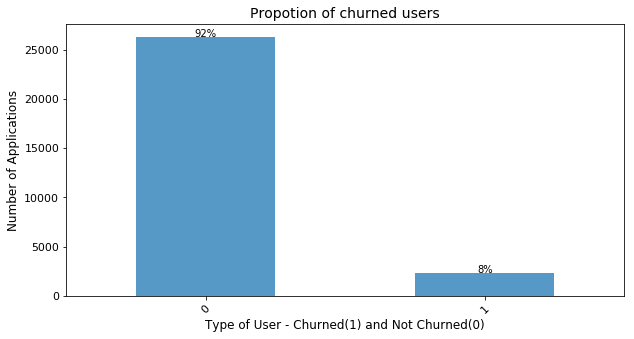

In [85]:
univariate_analysis(df_cleaned,'churn','Propotion of churned users','Type of User - Churned(1) and Not Churned(0)')

##### Derived Columns

In [86]:
#We know that internet usage includes 3g,2g for different months. Combining them into one column to know 
#if the user recharged for internet or not

df_cleaned['internet_usage'] = df_cleaned[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
df_cleaned['internet_usage'] = df_cleaned.internet_usage.map(lambda x: 1 if x == 0 else 0)

In [87]:
#Dropping the individual columns
df_cleaned = df_cleaned.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], axis=1)

In [88]:
df_cleaned.shape

(28619, 154)

In [89]:
#AON : Age on network - number of days the customer is using the operator T network.

#We can create a column which would categorise the number of days

df_cleaned['tenure'] = np.round(df_cleaned['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
df_cleaned['tenure'] = pd.cut(df_cleaned['tenure'], bins)
df_cleaned['tenure'].value_counts()

(4, 10]    8498
(1, 2]     7445
(0, 1]     5522
(2, 3]     4298
(3, 4]     2790
Name: tenure, dtype: int64

#### Data Visualization and ****Data Preparation****

In [90]:
churn_df_for_eda = df_cleaned.copy()
churn_df_for_eda.shape

(28619, 155)

In [91]:
#Lets first analyze arpu - average revenue per user
churn_df_for_eda[['arpu_6','arpu_7','arpu_8']].describe()

arpu_6        arpu_7        arpu_8
count  28619.000000  28619.000000  28619.000000
mean     540.882108    541.421529    486.909675
std      364.433069    364.426328    381.552867
min     -810.661000  -1289.715000   -345.129000
25%      306.409000    304.845000    226.126500
50%      476.450000    475.265000    420.918000
75%      688.504000    686.750500    647.648500
max     7283.872000   7199.400000   6194.049000

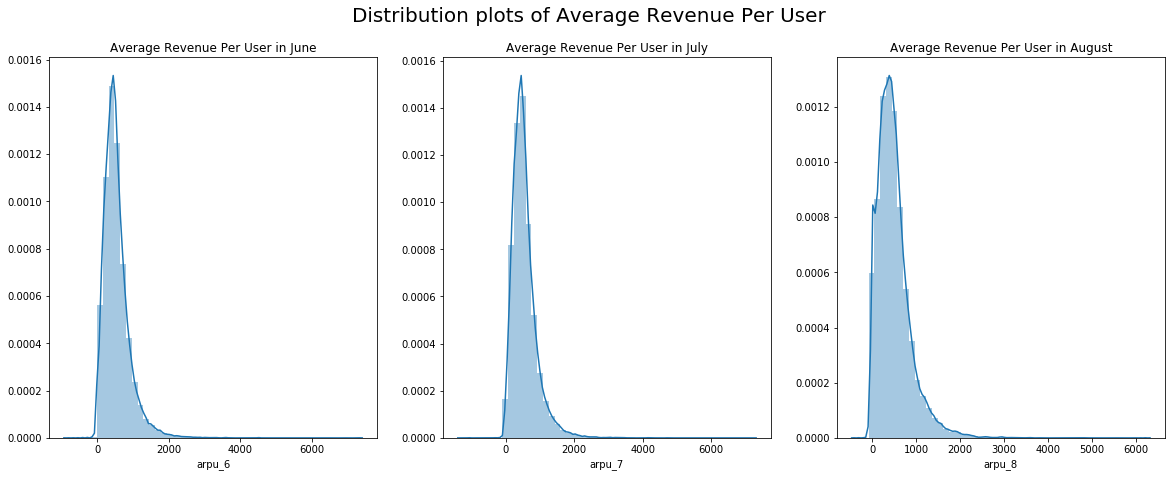

In [92]:
#Lets also plot Average Revenue Per User
plt.figure(figsize=(20,7))
plt.suptitle('Distribution plots of Average Revenue Per User',fontsize=20)
plt.subplot(131)
sns.distplot(churn_df_for_eda['arpu_6'])
plt.title('Average Revenue Per User in June')
plt.subplot(132)
sns.distplot(churn_df_for_eda['arpu_7'])
plt.title('Average Revenue Per User in July')
plt.subplot(133)
sns.distplot(churn_df_for_eda['arpu_8'])
plt.title('Average Revenue Per User in August')
plt.show()

In [93]:
#Insights - Revenue can not be negative. As even if user doesn't use any of the mobile service, revenue generated from his side can be 0 but not negative.
#This clearly shows junk data. Lets drop all such rows.

churn_df_for_eda = churn_df_for_eda[(churn_df_for_eda['arpu_6']>=0) & (churn_df_for_eda['arpu_7']>=0) & (churn_df_for_eda['arpu_8']>=0)]
churn_df_for_eda.shape

(28453, 155)

In [94]:
#Lets describe the fields again
churn_df_for_eda[['arpu_6','arpu_7','arpu_8']].describe()

arpu_6        arpu_7        arpu_8
count  28453.000000  28453.000000  28453.000000
mean     541.415615    543.219337    488.442008
std      363.448439    363.186371    380.503674
min        0.000000      0.000000      0.000000
25%      307.106000    306.883000    228.886000
50%      476.917000    476.247000    422.454000
75%      688.152000    687.324000    648.671000
max     7283.872000   7199.400000   6194.049000

Now, the data looks little good.

In [95]:
churn_df_for_eda.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803         0.00         0.00   
1     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
2     7001524846   378.721   492.223   137.362       413.69       351.03   
3     7002124215   514.453   597.753   637.760       102.41       132.11   
4     7000887461    74.350   193.897   366.966        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00          0.00          0.00          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              0.00        

After carefully examining the data I see that:
- loc_og_mou_6 = loc_og_t2t_mou_6 + loc_og_t2m_mou_6 + loc_og_t2f_mou_6 
- std_og_mou_6 = std_og_t2t_mou_6 + std_og_t2m_mou_6 + std_og_t2f_mou_6
- loc_ic_mou_6 = loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6 + loc_ic_t2f_mou_6 
- std_ic_mou_6 = std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6 

However difference of .03 is possible in case of rounding off individul columns. Hence, I have compared above conditions with a margin of 0.03


Similary for 7th and 8th month. 

First lets see if this is true for entire dataset.

In [96]:
#Verify Point#1: loc_og_mou_* = loc_og_t2t_mou_* + loc_og_t2m_mou_* + loc_og_t2f_mou_*


if(
    ((churn_df_for_eda['loc_og_mou_6'] - (churn_df_for_eda['loc_og_t2t_mou_6'] + churn_df_for_eda['loc_og_t2m_mou_6'] + churn_df_for_eda['loc_og_t2f_mou_6'])<0.03).all())
    and 
((churn_df_for_eda['loc_og_mou_7'] - (churn_df_for_eda['loc_og_t2t_mou_7'] + churn_df_for_eda['loc_og_t2m_mou_7'] + churn_df_for_eda['loc_og_t2f_mou_7'])<0.03).all()) and
    
((churn_df_for_eda['loc_og_mou_8'] - (churn_df_for_eda['loc_og_t2t_mou_8'] + churn_df_for_eda['loc_og_t2m_mou_8'] + churn_df_for_eda['loc_og_t2f_mou_8'])<0.03).all())
):
    print('Verified that: loc_og_mou_* = loc_og_t2t_mou_* + loc_og_t2m_mou_* + loc_og_t2f_mou_*')
else:
    print('Could not verify: loc_og_mou_* = loc_og_t2t_mou_* + loc_og_t2m_mou_* + loc_og_t2f_mou_*')

Verified that: loc_og_mou_* = loc_og_t2t_mou_* + loc_og_t2m_mou_* + loc_og_t2f_mou_*


In [97]:
#Verify Point#2: std_og_mou_* = std_og_t2t_mou_* + std_og_t2m_mou_* + std_og_t2f_mou_*

if(
    ((churn_df_for_eda['std_og_mou_6'] - (churn_df_for_eda['std_og_t2t_mou_6'] + churn_df_for_eda['std_og_t2m_mou_6'] + churn_df_for_eda['std_og_t2f_mou_6'])<0.03).all())
    and
    ((churn_df_for_eda['std_og_mou_7'] - (churn_df_for_eda['std_og_t2t_mou_7'] + churn_df_for_eda['std_og_t2m_mou_7'] + churn_df_for_eda['std_og_t2f_mou_7'])<0.03).all())
    and
    ((churn_df_for_eda['std_og_mou_8'] - (churn_df_for_eda['std_og_t2t_mou_8'] + churn_df_for_eda['std_og_t2m_mou_8'] + churn_df_for_eda['std_og_t2f_mou_8'])<0.03).all())
):
    print('Verified: std_og_mou_* = std_og_t2t_mou_* + std_og_t2m_mou_* + std_og_t2f_mou_*')
else:
    print('Could not verify: std_og_mou_* = std_og_t2t_mou_* + std_og_t2m_mou_* + std_og_t2f_mou_*')

Verified: std_og_mou_* = std_og_t2t_mou_* + std_og_t2m_mou_* + std_og_t2f_mou_*


In [98]:
#Verify Point#3: loc_ic_mou_* = loc_ic_t2t_mou_* + loc_ic_t2m_mou_* + loc_ic_t2f_mou_*

if(
    ((churn_df_for_eda['loc_ic_mou_6'] - (churn_df_for_eda['loc_ic_t2t_mou_6'] + churn_df_for_eda['loc_ic_t2m_mou_6'] + churn_df_for_eda['loc_ic_t2f_mou_6'])<0.03).all())
    and
    ((churn_df_for_eda['loc_ic_mou_7'] - (churn_df_for_eda['loc_ic_t2t_mou_7'] + churn_df_for_eda['loc_ic_t2m_mou_7'] + churn_df_for_eda['loc_ic_t2f_mou_7'])<0.03).all())
    and
    ((churn_df_for_eda['loc_ic_mou_8'] - (churn_df_for_eda['loc_ic_t2t_mou_8'] + churn_df_for_eda['loc_ic_t2m_mou_8'] + churn_df_for_eda['loc_ic_t2f_mou_8'])<0.03).all())
):
    print('Verified: loc_ic_mou_* = loc_ic_t2t_mou_* + loc_ic_t2m_mou_* + loc_ic_t2f_mou_*')
else:
    print('Could not verify: loc_ic_mou_* = loc_ic_t2t_mou_* + loc_ic_t2m_mou_* + loc_ic_t2f_mou_*')

Verified: loc_ic_mou_* = loc_ic_t2t_mou_* + loc_ic_t2m_mou_* + loc_ic_t2f_mou_*


In [99]:
#Verify Point#4: std_ic_mou_* = std_ic_t2t_mou_* + std_ic_t2m_mou_* + std_ic_t2f_mou_*

if(
    ((churn_df_for_eda['std_ic_mou_6'] - (churn_df_for_eda['std_ic_t2t_mou_6'] + churn_df_for_eda['std_ic_t2m_mou_6'] + churn_df_for_eda['std_ic_t2f_mou_6'])<0.03).all())
    and
    ((churn_df_for_eda['std_ic_mou_7'] - (churn_df_for_eda['std_ic_t2t_mou_7'] + churn_df_for_eda['std_ic_t2m_mou_7'] + churn_df_for_eda['std_ic_t2f_mou_7'])<0.03).all())
    and
    ((churn_df_for_eda['std_ic_mou_8'] - (churn_df_for_eda['std_ic_t2t_mou_8'] + churn_df_for_eda['std_ic_t2m_mou_8'] + churn_df_for_eda['std_ic_t2f_mou_8'])<0.03).all())
):
    print('Verified: std_ic_mou_* = std_ic_t2t_mou_* + std_ic_t2m_mou_* + std_ic_t2f_mou_*')
else:
    print('Could not verify: std_ic_mou_* = std_ic_t2t_mou_* + std_ic_t2m_mou_* + std_ic_t2f_mou_*')

Verified: std_ic_mou_* = std_ic_t2t_mou_* + std_ic_t2m_mou_* + std_ic_t2f_mou_*


As all 4 points hold true for entire dataset, we can now remove individual fields.

In [100]:
#Removing individual columns
churn_df_for_eda.drop(['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
                            'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
                            'loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6',
                            'std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6',
                            
                            'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
                            'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7',
                            'loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7',
                            'std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7',
                             
                            'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
                            'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
                            'loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8',
                            'std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'], axis=1, inplace=True)

In [101]:
churn_df_for_eda.shape

(28453, 116)

In [102]:
#We are now left with around 28.5k records and 116 features

In [103]:
#Creating a function for Univariate Analysis

def univariate_analysis1(col):
    plt.figure(figsize=(20,7))
    plt.suptitle('Distribution of '+col+' Against Churn', fontsize=18)
    plt.subplot(131)
    sns.boxplot(y=col+'_6', x='churn', data=churn_df_for_eda, showfliers=False)
    plt.title(''+col+ ' Distribution in Month: '+'6')
    plt.subplot(132)
    sns.boxplot(y=col+'_7', x='churn', data=churn_df_for_eda, showfliers=False)
    plt.title(''+col+ ' Distribution in Month: '+'7')
    plt.subplot(133)
    sns.boxplot(y=col+'_8', x='churn', data=churn_df_for_eda, showfliers=False)
    plt.title(''+col+ ' Distribution in Month: '+'8')
    plt.show()    

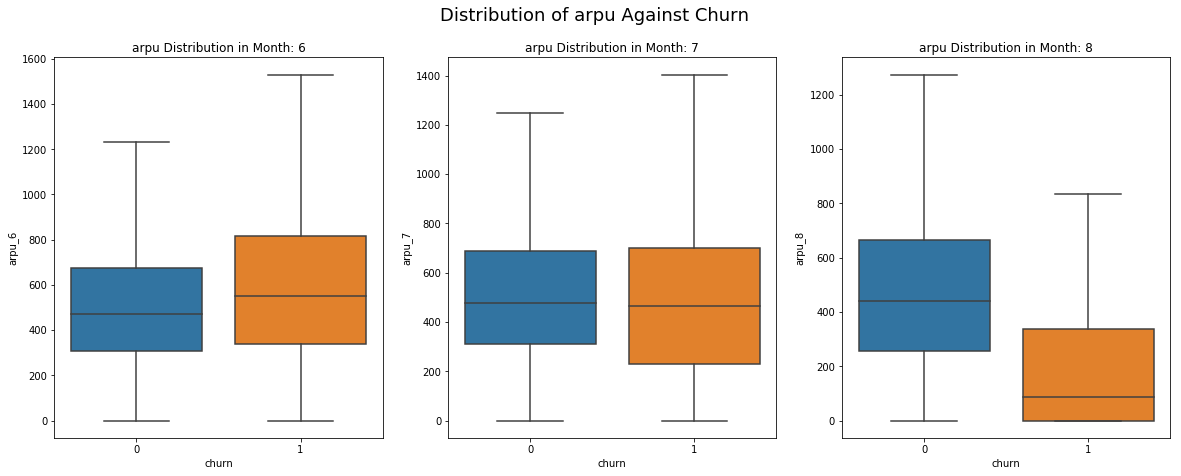

In [104]:
#Analyse Average Revenue per usuage
univariate_analysis1('arpu')

Insights - It is clearly visible that how average revenue per user has been drastically reduced in action phase for churned customers.

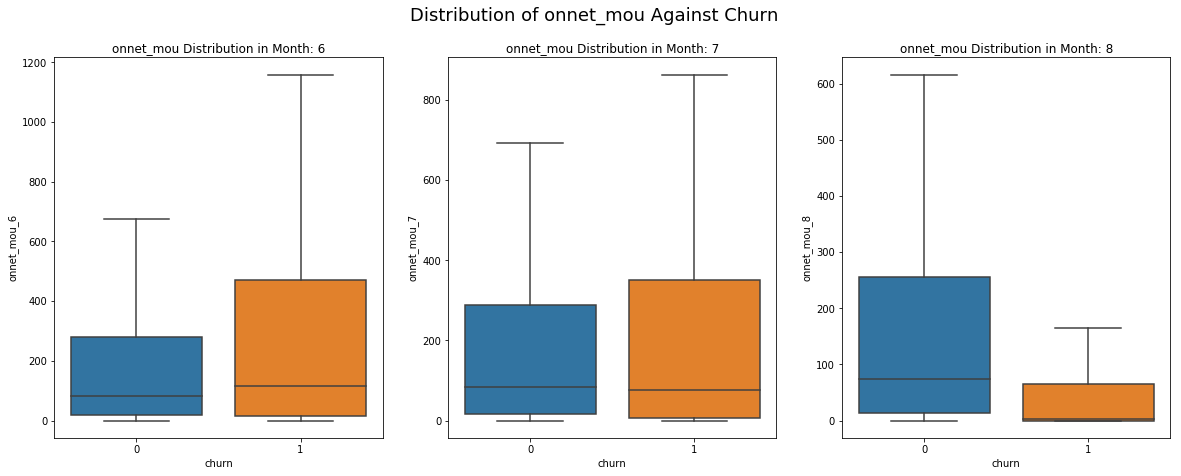

In [105]:
#Analyse all kinds of calls within same network
univariate_analysis1('onnet_mou')

Insights - Here also it is clearly visible that number of calls within the same operator has been reduced drastically in action phase i.e. Month=8

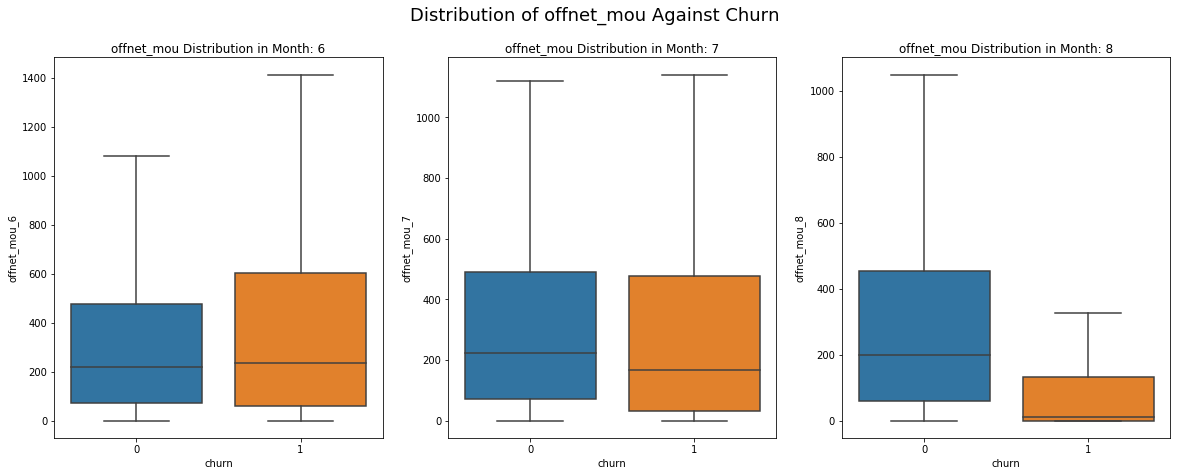

In [106]:
#Analyse all kinds of calls outside network
univariate_analysis1('offnet_mou')

Insights - Here also it is clearly visible that number of calls outside the operator has been reduced drastically in action phase i.e. Month=8

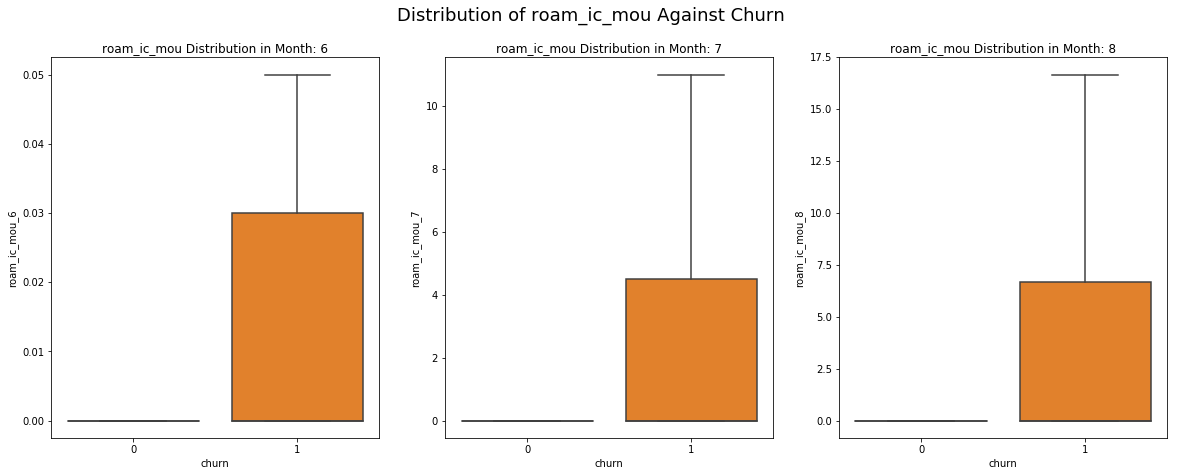

In [107]:
univariate_analysis1('roam_ic_mou')

Insights - I see that there are chances of people doing churn if in roaming zome but decrease is much less than that we had seen for onnet, offnet and arpu

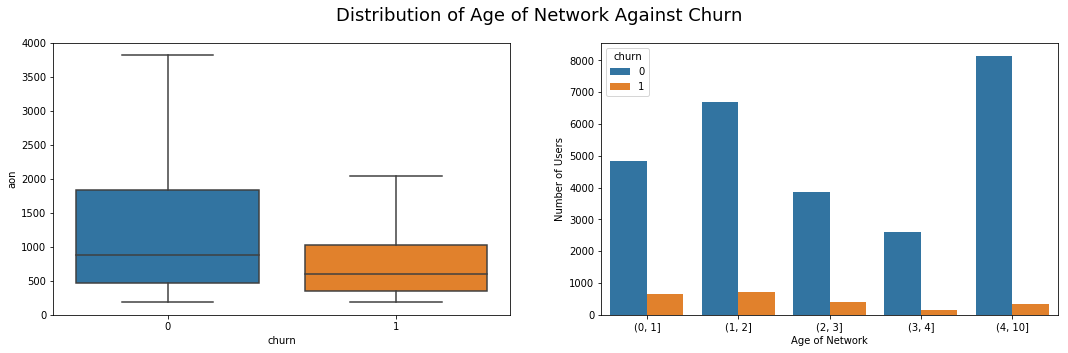

In [108]:
#Analyzing AON: Age on network - number of days the customer is using the operator T network and Tenure
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.suptitle('Distribution of Age of Network Against Churn', fontsize=18)
sns.boxplot(y='aon',x='churn', data=churn_df_for_eda, showfliers=False)
plt.subplot(122)
sns.countplot(x='tenure', hue='churn', data=churn_df_for_eda)

plt.xlabel('Age of Network')
plt.ylabel('Number of Users')
plt.show()

Insights
- From the first plot, I see that Customers whose tenure was less on network are mostly churned customers.
- Second plot shows us that if a customer tenure on netwrok is <2 years, his chances of churning are more. 
and customers who stayed on network for more than 4 years, he chances of staying on network will increase.

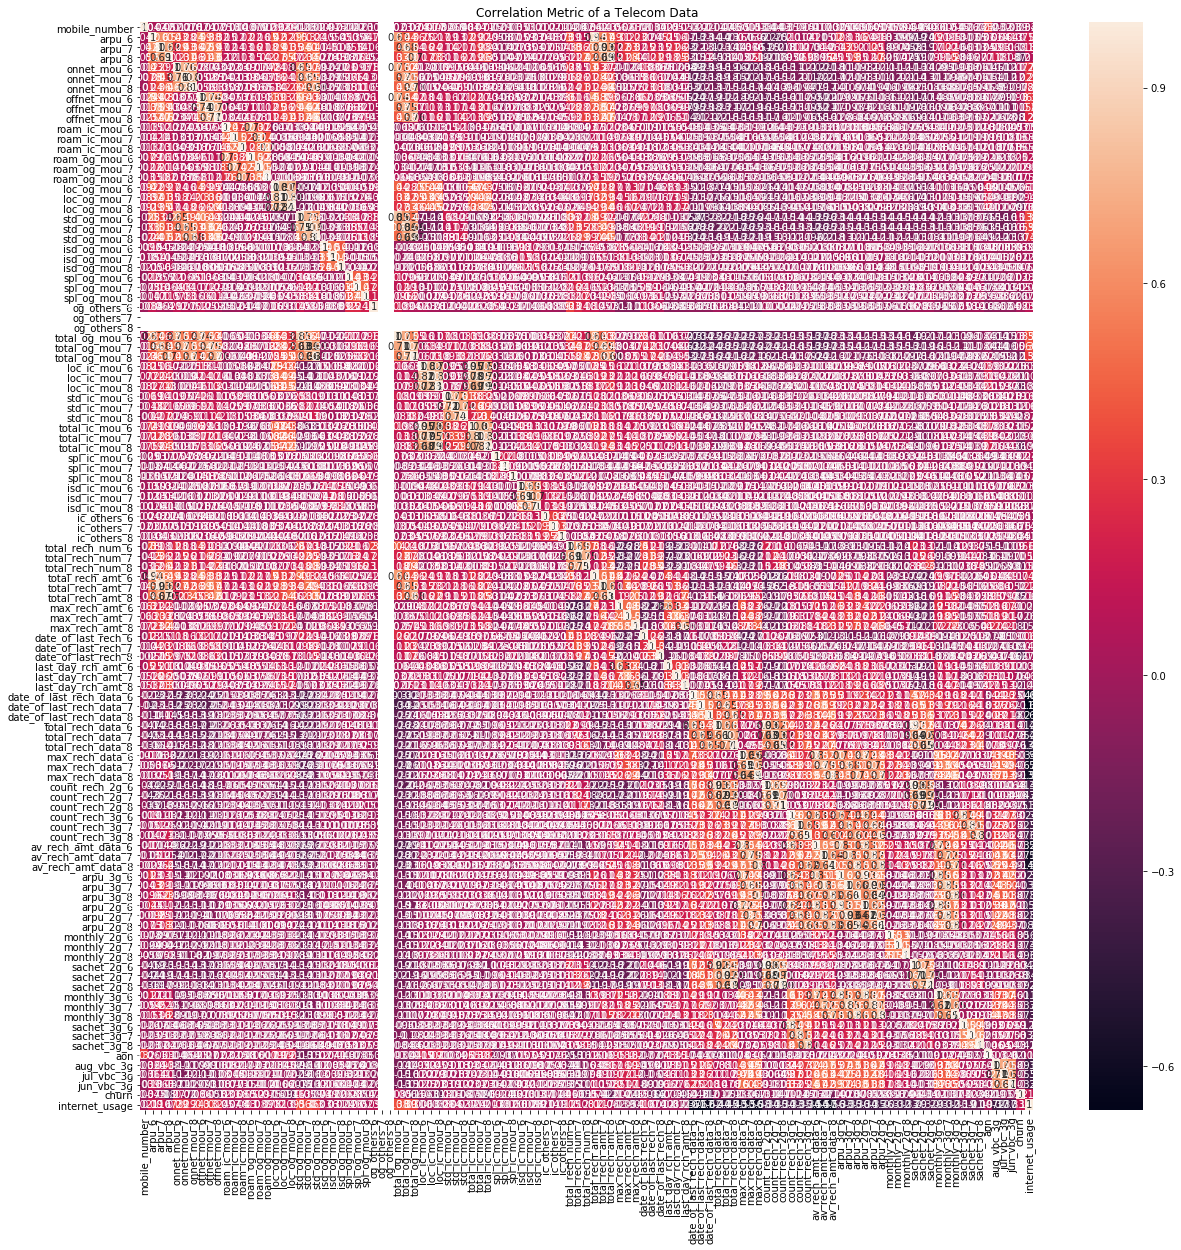

In [109]:
#Lets check for corrleation between our featurs now
telecom_metric = churn_df_for_eda.corr()
plt.figure(figsize=(20,20))
sns.heatmap(telecom_metric, xticklabels=telecom_metric.columns, yticklabels=telecom_metric.columns,annot=True)
plt.title("Correlation Metric of a Telecom Data")
plt.show()

In [110]:
# Create a metric out of correlation matrix without diagonal values

upper1_shape = np.ones(telecom_metric.shape)
np.fill_diagonal(upper1_shape,0)
upper1 = telecom_metric.where(upper1_shape.astype(np.bool))
# Find index of feature columns with correlation
correlatedCols_50 = [column for column in upper1.columns if any(upper1[column] > 0.50)]
correlatedCols_75 = [column for column in upper1.columns if any(upper1[column] > 0.75)]
correlatedCols_95 = [column for column in upper1.columns if any(upper1[column] > 0.95)]

print("greater than 50% correlation",correlatedCols_50)
print()
print("greater than 75% correlation",correlatedCols_75)
print()
print("greater than 95% correlation",correlatedCols_95)

greater than 50% correlation ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_

In [111]:
#Lets drop features with 95% correlation as er are not interested in knowing how many times a customer has recharged
#rather we want to know how much recharge he has done
bkp_churn_df_for_eda = churn_df_for_eda.copy() # Creating a backup
churn_df_for_eda.drop(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8'], axis=1, inplace=True)
churn_df_for_eda.shape

(28453, 110)

In [112]:
#Lets again check for corrleation and list down features having more than 70% corrleation

bkp = churn_df_for_eda.copy()
# Create correlation matrix
corr_matrix = churn_df_for_eda.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.70
#highly positive correlation features 
high_corr_cols = [column for column in upper.columns if any(upper[column] > 0.70)]
high_corr_cols

['onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'jul_vbc_3g']

In [113]:
churn_df_for_eda_new = churn_df_for_eda.drop(high_corr_cols, axis=1)
churn_df_for_eda_new.shape

(28453, 70)

In [114]:
#Lets now check for churn ratio in our dataset
print('Churn Ratio: ',100*sum(churn_df_for_eda_new['churn']==1)/len(churn_df_for_eda_new))

Churn Ratio:  7.935894281798053


I see that our data is highly imbalanced. we will have to handle this in modelling phase.

In [115]:
#lets again see features with no variance
col_1val = churn_df_for_eda_new.loc[:,churn_df_for_eda_new.nunique()==1].columns.to_list()
churn_df_for_eda_new.drop(col_1val, axis=1, inplace=True)
churn_df_for_eda_new.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  offnet_mou_6  \
0     7000842753   197.385   214.816   213.803         0.00          0.00   
1     7000701601  1069.180  1349.850  3171.480        57.84        453.43   
2     7001524846   378.721   492.223   137.362       413.69         94.66   
3     7002124215   514.453   597.753   637.760       102.41        757.93   
4     7000887461    74.350   193.897   366.966        48.96         85.41   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          16.23          33.49          31.64          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_mou_6  std_og_mou_6  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0          0.00          0.00           0.0          0.00          0.00   
1        422.16         60.86           0.0          0.18         10.01   
2        378.09        130.26           0.0          0.00          0.00   
3         97.04        763.29           0.0          0.00          0.00   
4        131.91          2.36           0.0          0.01          0.00   

   spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  loc_ic_mou_6  \
0           0.0           0.0          0.00          0.0          0.00   
1           4.5           0.0          6.50          0.0        427.88   
2           0.0           0.0         10.23          0.0         81.43   
3           0.0           0.0          0.00          0.0        125.33   
4           0.1           0.0         17.71          0.0        116.63   

   std_ic_mou_6  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0          0.00          0.00           0.0           0.0          0.00   
1        180.54          0.21           0.0           0.0          2.06   
2         22.43          0.00           0.0           0.0          0.00   
3         81.76          0.00           0.0           0.0          0.00   
4          2.94          0.00           0.0           0.0          0.00   

   isd_ic_mou_7  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  \
0          0.00         0.00         0.00         0.00                 4   
1         14.53        15.74        15.19        15.14                 5   
2          0.00         0.00         0.00         0.00                19   
3          0.00         0.00         0.00         0.00                22   
4         28.23         0.00         5.35        13.06                 3   

   total_rech_num_7  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
0                 3             252             252             252   
1                 5            1580             790            1580   
2                21              90             154              30   
3                26              50              50              50   
4                 5               0             179             179   

   date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  \
0                   21                   16                    8   
1                   27                   25                   26   
2                   25                   31                   30   
3                   30                   31                   31   
4                   18                    7                   24   

   last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
0                 252                 252                 252   
1                   0                   0                 779   
2                  50                   0                  10   
3                  30                  20                  50   
4                   0                 179                   0   

   date_of_last_rech_data_6 

In [116]:
#Creating backup for next phase
churn_df_for_modelling = churn_df_for_eda_new.copy()

### Feature Standardisation

In [117]:
#Creating Dummy variables for the category column and dropping the first one.
tenure_tel = pd.get_dummies(churn_df_for_modelling['tenure'],prefix='tenure',drop_first=True)
night_pck_6 = pd.get_dummies(churn_df_for_modelling['night_pck_user_6'],prefix='night_pck6',drop_first=True)
night_pck_7 = pd.get_dummies(churn_df_for_modelling['night_pck_user_7'],prefix='night_pck7',drop_first=True)
night_pck_8 = pd.get_dummies(churn_df_for_modelling['night_pck_user_8'],prefix='night_pck8',drop_first=True)

fb_user_6 = pd.get_dummies(churn_df_for_modelling['fb_user_6'],prefix='fb_user_6',drop_first=True)
fb_user_7 = pd.get_dummies(churn_df_for_modelling['fb_user_7'],prefix='fb_user_7',drop_first=True)
fb_user_8 = pd.get_dummies(churn_df_for_modelling['fb_user_8'],prefix='fb_user_8',drop_first=True)

#Adding the results to the master dataframe
churn_df_for_modelling = pd.concat([churn_df_for_modelling,tenure_tel,night_pck_6,night_pck_7,night_pck_8,
                                   fb_user_6,fb_user_7,fb_user_8],axis=1)

In [118]:
churn_df_for_modelling.drop(['tenure','night_pck_user_6','night_pck_user_7', 'night_pck_user_8',
                            'fb_user_6','fb_user_7','fb_user_8'],axis=1, inplace=True) #Dropping Original features as we have created dummies out of it
churn_df_for_modelling.drop('mobile_number',axis=1, inplace=True) #Dropping mobile number as that is not going to provide as any insights
churn_df_for_modelling.shape

(28453, 76)

In [119]:
churn_df_for_modelling.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  \
0   197.385   214.816   213.803         0.00          0.00           0.00   
1  1069.180  1349.850  3171.480        57.84        453.43          16.23   
2   378.721   492.223   137.362       413.69         94.66           0.00   
3   514.453   597.753   637.760       102.41        757.93           0.00   
4    74.350   193.897   366.966        48.96         85.41           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0           0.00           0.00           0.00           0.00          0.00   
1          33.49          31.64          12.59          38.06        422.16   
2           0.00           0.00           0.00           0.00        378.09   
3           0.00           0.00           0.00           0.00         97.04   
4           0.00           0.00           0.00           0.00        131.91   

   std_og_mou_6  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0          0.00           0.0          0.00          0.00           0.0   
1         60.86           0.0          0.18         10.01           4.5   
2        130.26           0.0          0.00          0.00           0.0   
3        763.29           0.0          0.00          0.00           0.0   
4          2.36           0.0          0.01          0.00           0.1   

   spl_og_mou_7  spl_og_mou_8  og_others_6  loc_ic_mou_6  std_ic_mou_6  \
0           0.0          0.00          0.0          0.00          0.00   
1           0.0          6.50          0.0        427.88        180.54   
2           0.0         10.23          0.0         81.43         22.43   
3           0.0          0.00          0.0        125.33         81.76   
4           0.0         17.71          0.0        116.63          2.94   

   spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  \
0          0.00           0.0           0.0          0.00          0.00   
1          0.21           0.0           0.0          2.06         14.53   
2          0.00           0.0           0.0          0.00          0.00   
3          0.00           0.0           0.0          0.00          0.00   
4          0.00           0.0           0.0          0.00         28.23   

   ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  \
0         0.00         0.00         0.00                 4                 3   
1        15.74        15.19        15.14                 5                 5   
2         0.00         0.00         0.00                19                21   
3         0.00         0.00         0.00                22                26   
4         0.00         5.35        13.06                 3                 5   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  date_of_last_rech_6  \
0             252             252             252                   21   
1            1580             790            1580                   27   
2              90             154              30                   25   
3              50              50              50                   30   
4               0             179             179                   18   

   date_of_last_rech_7  date_of_last_rech_8  last_day_rch_amt_6  \
0                   16                    8                 252   
1                   25                   26                   0   
2                   31                   30                  50   
3                   31                   31                  30   
4                    7                   24                   0   

   last_day_rch_amt_7  last_day_rch_amt_8  date_of_last_rech_data_6  \
0                 252                 252                        21   
1                   0                 779                         0   
2                   0                  10                         0   
3                  20                  50                         0   
4                 179               

In [120]:
# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

In [121]:
# applying normalize ( ) to all columns 
df_modelnorm = churn_df_for_modelling.apply(normalize) 
df_modelnorm.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  \
0  0.027099  0.029838  0.034517     0.000000      0.000000       0.000000   
1  0.146787  0.187495  0.512020     0.008250      0.068861       0.012273   
2  0.051994  0.068370  0.022176     0.059005      0.014376       0.000000   
3  0.070629  0.083028  0.102963     0.014607      0.115105       0.000000   
4  0.010207  0.026932  0.059245     0.006983      0.012971       0.000000   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0       0.000000       0.000000       0.000000       0.000000      0.000000   
1       0.031516       0.030067       0.007641       0.023851      0.090502   
2       0.000000       0.000000       0.000000       0.000000      0.081054   
3       0.000000       0.000000       0.000000       0.000000      0.020803   
4       0.000000       0.000000       0.000000       0.000000      0.028279   

   std_og_mou_6  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
0      0.000000           0.0      0.000000      0.000000      0.000000   
1      0.008288           0.0      0.001812      0.191469      0.018143   
2      0.017740           0.0      0.000000      0.000000      0.000000   
3      0.103952           0.0      0.000000      0.000000      0.000000   
4      0.000321           0.0      0.000101      0.000000      0.000403   

   spl_og_mou_7  spl_og_mou_8  og_others_6  loc_ic_mou_6  std_ic_mou_6  \
0           0.0      0.000000          0.0      0.000000      0.000000   
1           0.0      0.024992          0.0      0.084135      0.114615   
2           0.0      0.039334          0.0      0.016012      0.014240   
3           0.0      0.000000          0.0      0.024644      0.051905   
4           0.0      0.068094          0.0      0.022933      0.001866   

   spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  \
0       0.00000           0.0           0.0      0.000000      0.000000   
1       0.09633           0.0           0.0      0.002663      0.017911   
2       0.00000           0.0           0.0      0.000000      0.000000   
3       0.00000           0.0           0.0      0.000000      0.000000   
4       0.00000           0.0           0.0      0.000000      0.034799   

   ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  \
0     0.000000     0.000000     0.000000          0.023529          0.021739   
1     0.226605     0.183609     0.215854          0.029412          0.036232   
2     0.000000     0.000000     0.000000          0.111765          0.152174   
3     0.000000     0.000000     0.000000          0.129412          0.188406   
4     0.000000     0.064668     0.186199          0.017647          0.036232   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  date_of_last_rech_6  \
0        0.084000        0.081290        0.084000             0.700000   
1        0.526667        0.254839        0.526667             0.900000   
2        0.030000        0.049677        0.010000             0.833333   
3        0.016667        0.016129        0.016667             1.000000   
4        0.000000        0.057742        0.059667             0.600000   

   date_of_last_rech_7  date_of_last_rech_8  last_day_rch_amt_6  \
0             0.516129             0.258065            0.114598   
1             0.806452             0.838710            0.000000   
2             1.000000             0.967742            0.022738   
3             1.000000             1.000000            0.013643   
4             0.225806             0.774194            0.000000   

   last_day_rch_amt_7  last_day_rch_amt_8  date_of_last_rech_data_6  \
0            0.120000            0.120000                       0.7   
1            0.000000            0.370952                       0.0   
2            0.000000            0.004762                       0.0   
3            0.009524            0.023810                       0.0   
4            0.085238            0.0

In [122]:
# checking Churn Rate
churn = (sum(df_modelnorm['churn'])/len(df_modelnorm['churn'].index))*100
churn

7.935894281798054

### Modelling

In [123]:
#Copy
churn_model = df_modelnorm.copy()
churn_model.shape

(28453, 76)

In [124]:
# Putting response variable to y
y = churn_model['churn']

# Putting feature variable to X
X = churn_model.drop(['churn'],axis=1)

In [125]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
print('Train Dataset Size: ', X_train.shape)
print('Test Dataset Size: ', X_test.shape)

Train Dataset Size:  (19917, 75)
Test Dataset Size:  (8536, 75)


In [126]:
col = X_train.columns
X_train.dtypes

arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
offnet_mou_6                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_mou_6                float64
std_og_mou_6                float64
isd_og_mou_6                float64
isd_og_mou_7                float64
isd_og_mou_8                float64
spl_og_mou_6                float64
spl_og_mou_7                float64
spl_og_mou_8                float64
og_others_6                 float64
loc_ic_mou_6                float64
std_ic_mou_6                float64
spl_ic_mou_6                float64
spl_ic_mou_7                float64
spl_ic_mou_8                float64
isd_ic_mou_6                float64
isd_ic_mou_7                float64
ic_others_6                 float64
ic_others_7                 

### Running First Training Model

In [127]:
import statsmodels.api as sm
# Logistic regression model
logmodel = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmodel.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19917
Model:                            GLM   Df Residuals:                    19844
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3670.0
Date:                Mon, 16 Dec 2019   Deviance:                       7339.9
Time:                        22:14:44   Pearson chi2:                 2.38e+05
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.9272      0.381      2.435      0.015       0.181       1.673
arpu_6                       6.5697      1.250      5.256      0.000       4.120       9.019
arpu_7                       7.2381      1.147      6.309      0.000       4.990       9.486
arpu_8                     -19.6478      1.124    -17.483      0.000     -21.851     -17.445
onnet_mou_6                  1.1317      2.717      0.417      0.677      -4.194       6.457
offnet_mou_6                 1.5605      2.538      0.615      0.539      -3.414       6.535
roam_ic_mou_6               -1.0807      0.958     -1.129      0.259      -2.958       0.796
roam_ic_mou_7                2.5942      0.798      3.251      0.001       1.030       4.158
roam_ic_mou_8               -0.6111      0.756     -0.809      0.419      -2.092       0.870
roam_og_mou_7               -0.0167      0.694     -0.024      0.981      -1.377       1.344
roam_og_mou_8                5.9858      0.680      8.804      0.000       4.653       7.318
loc_og_mou_6                -3.9419      1.813     -2.174      0.030      -7.496      -0.388
std_og_mou_6                -0.6579      2.727     -0.241      0.809      -6.002       4.687
isd_og_mou_6                -0.2985      0.771     -0.387      0.699      -1.809       1.212
isd_og_mou_7                 0.7399      0.796      0.930      0.353      -0.820       2.300
isd_og_mou_8                 1.3153      0.886      1.485      0.138      -0.421       3.051
spl_og_mou_6                 0.1845      0.652      0.283      0.777      -1.094       1.463
spl_og_mou_7                 0.6146      0.654      0.940      0.347      -0.667       1.896
spl_og_mou_8                -3.0549      1.047     -2.919      0.004      -5.106      -1.004
og_others_6                 -0.8671      0.600     -1.446      0.148      -2.042       0.308
loc_ic_mou_6                -1.4594      0.771     -1.893      0.058      -2.970       0.051
std_ic_mou_6                 0.4471      0.552      0.810      0.418      -0.634       1.528
spl_ic_mou_6                 0.3392      0.482      0.704      0.482      -0.606       1.284
spl_ic_mou_7                 0.1175      0.535      0.220      0.826      -0.932       1.167
spl_ic_mou_8                -6.9924      1.110     -6.300      0.000      -9.168      -4.817
isd_ic_mou_6                 1.0842      0.865      1.254      0.210      -0.611       2.779
isd_ic_mou_7                 0.0088      0.963      0.009      0.993      -1.879       1.897
ic_others_6                  0.7516      0.688      1.093      0.275      -0.597       2.100
ic_others_7                  0.1979      0.742      0.267      0.790      -1.257       1.652
ic_others_8                 -1.9329      1.153     -1.677      0.094      -4.192       0.327
total_rech_num_6             0.2469      0.967      0.255      0.798      -1.648       2.141


### Feature Selection Using RFE

In [128]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

[ True  True  True False False False False False False  True  True  True
 False False False False False  True False  True False False False  True
 False False False False False False False False False False False False
  True False False  True False False False  True False  True False False
 False False False False False False  True False  True False False False
 False False False False False False False False False False False False
 False False False]
[ 1  1  1 36 38 26 13  6  9  1  1  1 27 22  5 35 28  1 29  1 34 39 53  1
 17  8 47 50  2 43 19 48  3 11 30 20  1 49 21  1 45 55 12  1 14  1 15 25
 32 33 10 23 16  4  1  7  1 18 61 56 60 37 44 54 42 58 51 57 31 41 46 52
 59 24 40]


In [129]:
col1 = X_train.columns[rfe.support_]  #Features selected by RFE
col1

Index(['arpu_6', 'arpu_7', 'arpu_8', 'roam_og_mou_8', 'loc_og_mou_6',
       'std_og_mou_6', 'spl_og_mou_8', 'loc_ic_mou_6', 'spl_ic_mou_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_8', 'monthly_2g_8', 'aug_vbc_3g'],
      dtype='object')

In [130]:
X_train.columns[~rfe.support_]  #Features not selected by RFE

Index(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_7', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'monthly_2g_6', 'monthly_2g_7',
       'aon', 'jun_vbc_3g', 'internet_usage', 'tenure_(1, 2]', 'tenure_(2, 3]',
       'tenure_(3, 4]', 'tenure_(4, 10]', 'night_pck6_1', 'night_pck6_2',
       '

In [131]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col1], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19917
Model:                            GLM   Df Residuals:                    19901
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3823.5
Date:                Mon, 16 Dec 2019   Deviance:                       7647.0
Time:                        22:15:37   Pearson chi2:                 1.99e+06
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1125      0.102     -1.097      0.273      -0.313       0.088
arpu_6                  7.6541      0.861      8.891      0.000       5.967       9.341
arpu_7                  7.5488      0.814      9.271      0.000       5.953       9.145
arpu_8                -20.8002      1.032    -20.160      0.000     -22.822     -18.778
roam_og_mou_8           6.4982      0.435     14.935      0.000       5.645       7.351
loc_og_mou_6           -3.4435      0.677     -5.088      0.000      -4.770      -2.117
std_og_mou_6            1.0588      0.436      2.428      0.015       0.204       1.914
spl_og_mou_8           -2.8669      0.933     -3.072      0.002      -4.696      -1.038
loc_ic_mou_6           -2.2218      0.787     -2.821      0.005      -3.765      -0.678
spl_ic_mou_8           -6.5208      1.093     -5.968      0.000      -8.662      -4.379
date_of_last_rech_8    -1.8882      0.115    -16.361      0.000      -2.114      -1.662
last_day_rch_amt_8    -10.2477      1.053     -9.730      0.000     -12.312      -8.183
total_rech_data_6       2.8425      0.614      4.629      0.000       1.639       4.046
total_rech_data_8     -10.8838      1.105     -9.849      0.000     -13.050      -8.718
monthly_2g_8           -5.1458      0.850     -6.057      0.000      -6.811      -3.481
aug_vbc_3g             -9.1116      1.455     -6.262      0.000     -11.964      -6.260
=======================================================================================
"""

We have low p values, lets check for VIF

In [133]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                arpu_6  7.82
1                arpu_7  7.59
2                arpu_8  6.22
9   date_of_last_rech_8  5.37
4          loc_og_mou_6  2.60
5          std_og_mou_6  2.46
7          loc_ic_mou_6  2.18
11    total_rech_data_6  2.16
12    total_rech_data_8  2.16
10   last_day_rch_amt_8  1.76
14           aug_vbc_3g  1.38
6          spl_og_mou_8  1.25
13         monthly_2g_8  1.22
3         roam_og_mou_8  1.12
8          spl_ic_mou_8  1.09

In [135]:
#dropping column arpu_6 as it is highly correlated with other features

col1=col1.drop('arpu_6')

#create a new model

X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19917
Model:                            GLM   Df Residuals:                    19902
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3862.4
Date:                Mon, 16 Dec 2019   Deviance:                       7724.8
Time:                        22:15:39   Pearson chi2:                 2.20e+06
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1585      0.098      1.625      0.104      -0.033       0.350
arpu_7                  8.9452      0.807     11.088      0.000       7.364      10.526
arpu_8                -20.2505      1.026    -19.738      0.000     -22.261     -18.240
roam_og_mou_8           6.8362      0.433     15.774      0.000       5.987       7.686
loc_og_mou_6           -1.4982      0.607     -2.467      0.014      -2.689      -0.308
std_og_mou_6            3.4313      0.348      9.874      0.000       2.750       4.112
spl_og_mou_8           -3.2182      0.947     -3.399      0.001      -5.074      -1.363
loc_ic_mou_6           -1.7786      0.760     -2.340      0.019      -3.269      -0.289
spl_ic_mou_8           -6.6008      1.098     -6.010      0.000      -8.754      -4.448
date_of_last_rech_8    -1.9873      0.114    -17.477      0.000      -2.210      -1.764
last_day_rch_amt_8    -10.3333      1.061     -9.739      0.000     -12.413      -8.254
total_rech_data_6       3.3464      0.608      5.500      0.000       2.154       4.539
total_rech_data_8     -11.5152      1.106    -10.410      0.000     -13.683      -9.347
monthly_2g_8           -5.1195      0.849     -6.029      0.000      -6.784      -3.455
aug_vbc_3g             -8.5094      1.443     -5.896      0.000     -11.338      -5.681
=======================================================================================
"""

In [136]:
#pValues look good now. Lets check for VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                arpu_7  6.97
1                arpu_8  6.13
8   date_of_last_rech_8  5.26
3          loc_og_mou_6  2.22
6          loc_ic_mou_6  2.15
11    total_rech_data_8  2.13
10    total_rech_data_6  2.08
4          std_og_mou_6  1.75
9    last_day_rch_amt_8  1.75
13           aug_vbc_3g  1.35
5          spl_og_mou_8  1.24
12         monthly_2g_8  1.22
2         roam_og_mou_8  1.11
7          spl_ic_mou_8  1.09

In [137]:
#Drop arpu_7 as it is significantly correlated with other features

col1=col1.drop('arpu_7')

X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19917
Model:                            GLM   Df Residuals:                    19903
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3921.2
Date:                Mon, 16 Dec 2019   Deviance:                       7842.5
Time:                        22:15:40   Pearson chi2:                 2.35e+06
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4936      0.093      5.329      0.000       0.312       0.675
arpu_8                -16.1835      0.948    -17.079      0.000     -18.041     -14.326
roam_og_mou_8           7.0942      0.427     16.609      0.000       6.257       7.931
loc_og_mou_6           -0.8607      0.590     -1.458      0.145      -2.018       0.297
std_og_mou_6            4.5419      0.334     13.602      0.000       3.887       5.196
spl_og_mou_8           -3.0140      0.934     -3.228      0.001      -4.844      -1.184
loc_ic_mou_6           -1.5235      0.741     -2.056      0.040      -2.975      -0.071
spl_ic_mou_8           -6.8426      1.097     -6.237      0.000      -8.993      -4.692
date_of_last_rech_8    -1.9864      0.113    -17.583      0.000      -2.208      -1.765
last_day_rch_amt_8    -10.7539      1.075    -10.006      0.000     -12.860      -8.647
total_rech_data_6       2.5743      0.614      4.192      0.000       1.371       3.778
total_rech_data_8     -12.0654      1.105    -10.920      0.000     -14.231      -9.900
monthly_2g_8           -5.4056      0.849     -6.369      0.000      -7.069      -3.742
aug_vbc_3g             -7.8088      1.422     -5.491      0.000     -10.596      -5.022
=======================================================================================
"""

In [138]:
#Dropping loc_og_mou_6 as its pValues as been increased beyond significance limit
col1=col1.drop('loc_og_mou_6')
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19917
Model:                            GLM   Df Residuals:                    19904
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3922.3
Date:                Mon, 16 Dec 2019   Deviance:                       7844.7
Time:                        22:15:40   Pearson chi2:                 2.44e+06
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4707      0.091      5.152      0.000       0.292       0.650
arpu_8                -16.3384      0.942    -17.341      0.000     -18.185     -14.492
roam_og_mou_8           7.1080      0.427     16.633      0.000       6.270       7.946
std_og_mou_6            4.5884      0.333     13.790      0.000       3.936       5.241
spl_og_mou_8           -3.0197      0.935     -3.231      0.001      -4.852      -1.188
loc_ic_mou_6           -2.0306      0.675     -3.007      0.003      -3.354      -0.707
spl_ic_mou_8           -6.8179      1.096     -6.223      0.000      -8.965      -4.671
date_of_last_rech_8    -1.9793      0.113    -17.538      0.000      -2.200      -1.758
last_day_rch_amt_8    -10.7670      1.075    -10.017      0.000     -12.874      -8.660
total_rech_data_6       2.6633      0.611      4.362      0.000       1.467       3.860
total_rech_data_8     -12.0233      1.104    -10.890      0.000     -14.187      -9.859
monthly_2g_8           -5.3605      0.848     -6.321      0.000      -7.023      -3.698
aug_vbc_3g             -7.6747      1.415     -5.423      0.000     -10.449      -4.901
=======================================================================================
"""

In [139]:
#pValues look good now also. Lets check for VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6   date_of_last_rech_8  4.75
0                arpu_8  3.97
9     total_rech_data_8  2.11
8     total_rech_data_6  2.08
7    last_day_rch_amt_8  1.75
4          loc_ic_mou_6  1.69
2          std_og_mou_6  1.57
11           aug_vbc_3g  1.34
3          spl_og_mou_8  1.24
10         monthly_2g_8  1.21
1         roam_og_mou_8  1.11
5          spl_ic_mou_8  1.09

All our feature variabes have VIF<5 which shows they are not corrleated with other independent variables.

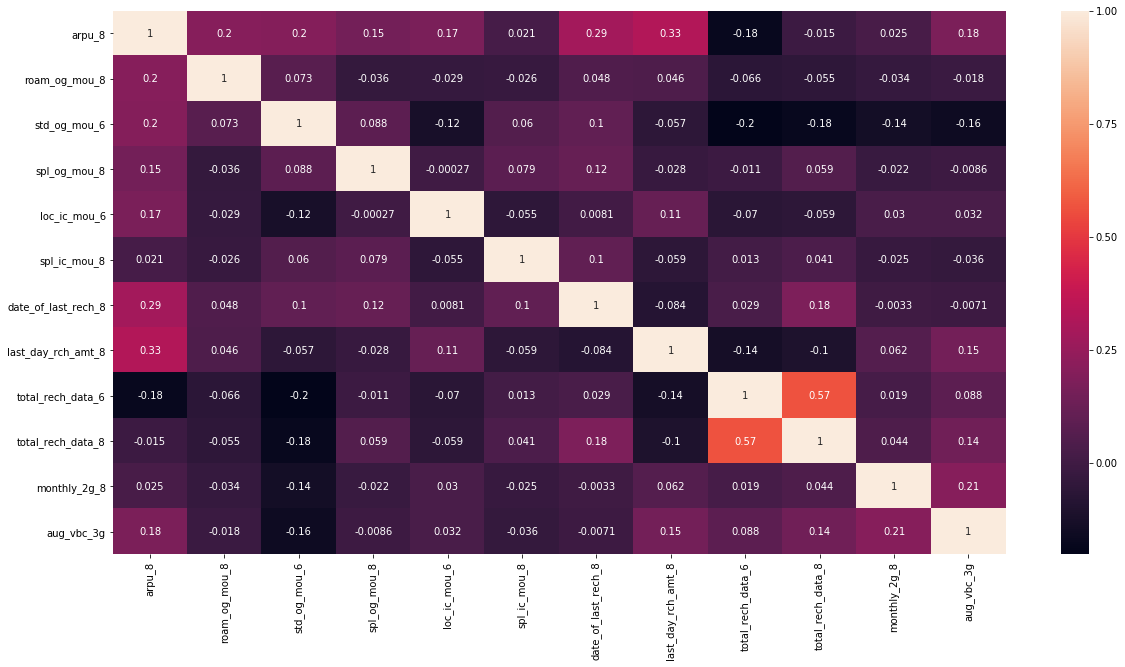

In [140]:
# Let's see the correlation matrix if there is any high corrleation visible in independent variables.
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X[col1].corr(),annot = True)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col1], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col1])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [143]:
#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col1])
y_pred_default = logsk.predict(X_test[col1])

In [144]:
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [145]:
#Lets check if all probabilities are in between 0 ansd 1
((y_pred_final['churn_prob']<0).any()) or ((y_pred_final['churn_prob']>1).any())

False

All our prediction probabilities are within probability range i.e. 0-1

In [146]:
#Lets now create a metric which shows feature importance chosen by Logistic Regression Model
important_features = pd.DataFrame(logsk.coef_, columns=col1).transpose()
important_features.rename(columns={0: 'Feature Importance'}, inplace=True)
important_features.sort_values(by='Feature Importance',ascending=False)

Feature Importance
roam_og_mou_8                  7.316544
std_og_mou_6                   4.652236
total_rech_data_6              2.373247
date_of_last_rech_8           -2.822676
spl_og_mou_8                  -3.048544
loc_ic_mou_6                  -3.100914
aug_vbc_3g                    -4.162415
spl_ic_mou_8                  -4.609357
monthly_2g_8                  -5.181423
last_day_rch_amt_8            -7.086079
total_rech_data_8             -8.195316
arpu_8                       -10.423622

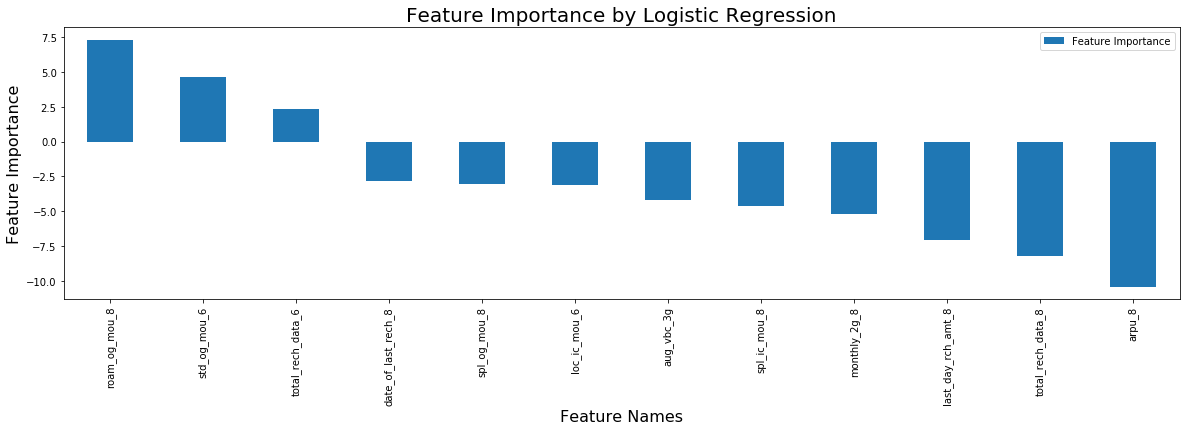

In [147]:
#Plot most important features selected by Interpretable Model(Logistic Regression):
important_features.sort_values(by='Feature Importance',ascending=False).plot(figsize=(20,5), kind='bar')
plt.title('Feature Importance by Logistic Regression', fontsize=20)
plt.xlabel('Feature Names', fontsize=16)
plt.ylabel('Feature Importance', fontsize=16)
plt.show()

In [148]:
#Now lets look at evaluation Metrics
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8778346039151198


In [149]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

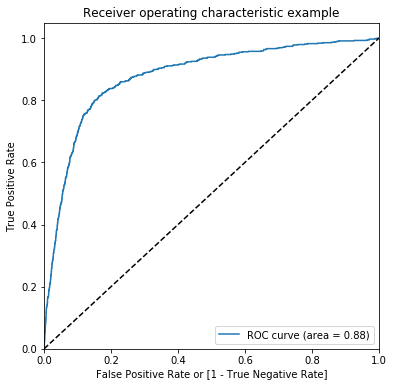

(array([0.        , 0.        , 0.        , ..., 0.99974529, 0.99987264,
        1.        ]),
 array([0.        , 0.00146199, 0.00292398, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99565663e+00, 9.95656630e-01, 9.92342694e-01, ...,
        1.68690436e-04, 1.26411345e-04, 1.48593056e-05]))

In [150]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [151]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0    0.0    0.109315    1    1    0    0    0    0    0    0    0    0
1    0.0    0.425004    1    1    1    1    1    0    0    0    0    0
2    0.0    0.254230    1    1    1    0    0    0    0    0    0    0
3    0.0    0.349328    1    1    1    1    0    0    0    0    0    0
4    0.0    0.411702    1    1    1    1    1    0    0    0    0    0

In [152]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    #prec = cm1[1,1]/(cm1[1,1] + cm1[0,1])
    #recall = cm1[1,1]/(cm1[1,1] + cm1[1,0])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080131  0.000000  1.000000
0.1   0.1  0.262887  0.200204  0.982456
0.2   0.2  0.430061  0.384106  0.957602
0.3   0.3  0.584114  0.554381  0.925439
0.4   0.4  0.713918  0.698675  0.888889
0.5   0.5  0.814784  0.813423  0.830409
0.6   0.6  0.874649  0.886526  0.738304
0.7   0.7  0.902530  0.932119  0.562865
0.8   0.8  0.916003  0.963576  0.369883
0.9   0.9  0.920806  0.983062  0.206140


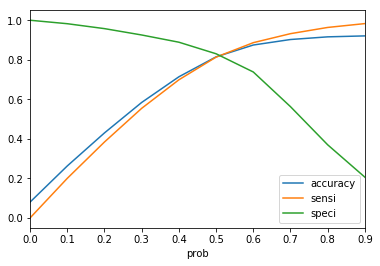

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [154]:
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0    0.0    0.109315    1    1    0    0    0    0    0    0    0    0
1    0.0    0.425004    1    1    1    1    1    0    0    0    0    0
2    0.0    0.254230    1    1    1    0    0    0    0    0    0    0
3    0.0    0.349328    1    1    1    1    0    0    0    0    0    0
4    0.0    0.411702    1    1    1    1    1    0    0    0    0    0

In [155]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5118150454538892]


In [156]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.51 else 0)

y_pred_final.churn.value_counts()

0.0    7852
1.0     684
Name: churn, dtype: int64

In [157]:
# Confusion matrix 
confusion1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion1

array([[6451, 1401],
       [ 120,  564]], dtype=int64)

In [158]:
#Lets calculate Metrics

TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

print('Accuracy Score : ',metrics.accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

from sklearn.metrics import precision_score, recall_score
#Precision
print('Precision Score: ', precision_score(y_test,y_pred_default))

#Recall
print('Recall Score: ',recall_score(y_test,y_pred_default))

Accuracy Score :  0.814784442361762
Sensitivity:  0.8245614035087719
Specificity:  0.8215741212429954
false postive rate:  0.17842587875700458
positive predictive value:  0.2870229007633588
Negative predictive value:  0.9817379394308324
Precision Score:  0.279390063944909
Recall Score:  0.8304093567251462


# PCA

In [159]:
#Feature Selection 
import statsmodels.api as sm
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LassoCV,RidgeCV
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [160]:
# apply pca to train data
pca = PCA(random_state=100, svd_solver='randomized')
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)
pca.components_

array([[-7.35248543e-03, -6.70304131e-03, -4.09488590e-03, ...,
        -2.98866554e-01,  2.93049249e-01, -2.85014073e-01],
       [ 7.45603802e-04,  1.28157856e-02,  2.58695570e-02, ...,
         3.27436796e-02,  3.16805100e-01, -4.02377296e-01],
       [ 5.96035654e-03,  1.16963389e-03,  4.17783406e-03, ...,
         1.22511588e-02, -6.50370207e-02,  8.04328757e-02],
       ...,
       [-1.71352812e-15,  1.57484368e-15,  2.01129447e-16, ...,
        -7.07695343e-02,  2.47775183e-16,  7.03556446e-01],
       [ 0.00000000e+00,  5.63838663e-17,  7.87986900e-17, ...,
         7.03556446e-01,  3.51580209e-17,  7.07695343e-02],
       [-0.00000000e+00,  5.13297452e-17,  4.14214628e-17, ...,
         3.97021175e-12, -4.71124771e-19, -1.23199186e-14]])

In [161]:
pca.explained_variance_ratio_

array([5.35162995e-01, 8.94095643e-02, 8.05547634e-02, 6.55347486e-02,
       4.84677510e-02, 2.92131429e-02, 2.57930762e-02, 1.43200445e-02,
       1.16556986e-02, 1.01043351e-02, 9.00503435e-03, 7.58999880e-03,
       7.01986465e-03, 5.58957252e-03, 5.31454875e-03, 4.34888528e-03,
       3.98515945e-03, 3.88576369e-03, 3.82684244e-03, 2.94489766e-03,
       2.35315803e-03, 1.91775120e-03, 1.87842485e-03, 1.83986926e-03,
       1.77748321e-03, 1.58792569e-03, 1.54153051e-03, 1.32740323e-03,
       1.22803823e-03, 1.15477815e-03, 1.11984288e-03, 1.11237024e-03,
       1.05609135e-03, 9.46513847e-04, 9.45276456e-04, 8.45974812e-04,
       8.03260686e-04, 7.48686922e-04, 7.42947433e-04, 7.34260382e-04,
       6.85928595e-04, 6.70526947e-04, 6.31379201e-04, 6.11488925e-04,
       5.52672028e-04, 5.27399474e-04, 4.86978001e-04, 4.84531426e-04,
       4.52014450e-04, 4.36916746e-04, 4.22679229e-04, 4.10478931e-04,
       3.89428214e-04, 3.73376784e-04, 3.59572043e-04, 3.29739239e-04,
      

In [162]:
#Cumulative variance explained by PCs
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.535163  , 0.62457256, 0.70512732, 0.77066207, 0.81912982,
       0.84834297, 0.87413604, 0.88845609, 0.90011178, 0.91021612,
       0.91922115, 0.92681115, 0.93383102, 0.93942059, 0.94473514,
       0.94908402, 0.95306918, 0.95695495, 0.96078179, 0.96372669,
       0.96607985, 0.9679976 , 0.96987602, 0.97171589, 0.97349337,
       0.9750813 , 0.97662283, 0.97795023, 0.97917827, 0.98033305,
       0.98145289, 0.98256526, 0.98362135, 0.98456787, 0.98551314,
       0.98635912, 0.98716238, 0.98791107, 0.98865401, 0.98938827,
       0.9900742 , 0.99074473, 0.99137611, 0.9919876 , 0.99254027,
       0.99306767, 0.99355465, 0.99403918, 0.99449119, 0.99492811,
       0.99535079, 0.99576127, 0.9961507 , 0.99652407, 0.99688365,
       0.99721339, 0.99752586, 0.99780047, 0.99805295, 0.99830053,
       0.9985349 , 0.99875571, 0.998935  , 0.99911061, 0.99927819,
       0.99942804, 0.99957252, 0.9997011 , 0.99981494, 0.9999219 ,
       0.99999353, 1.        , 1.        , 1.        , 1.     

From above cumulative variance, it is clear that 10 PCs can explain over 91% of variance. So, we will go with 10 PCs.

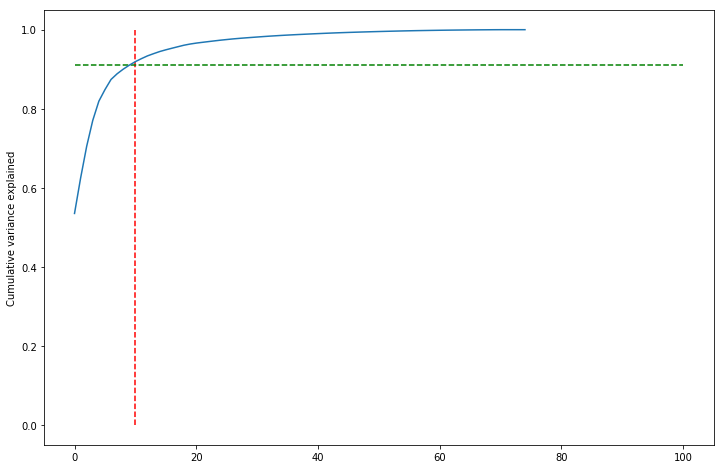

In [163]:
#lets now plot cumulative variance by PCs

fig = plt.figure(figsize=[12,8])
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.91, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

we will go with 10 PCs as it can explain almost 91% of variance.

In [164]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(19917, 10)

In [165]:
#Correlation matrix

#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

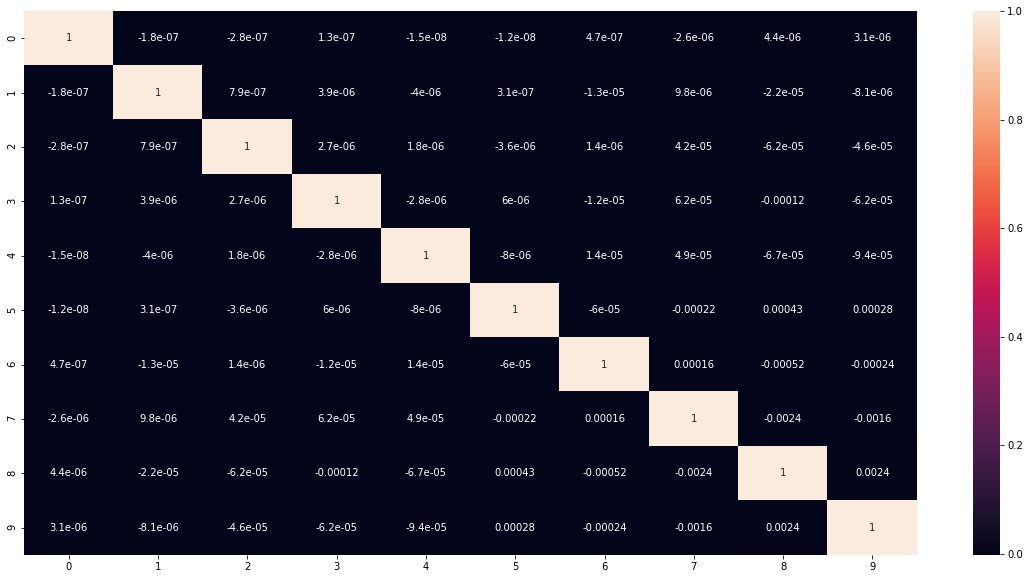

In [166]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

As there is no correlation between principle components, we are good to go ahead.

In [167]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8536, 10)

In [168]:
#Training the model on the train data
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [169]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [170]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [171]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8144954315658394


In [172]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

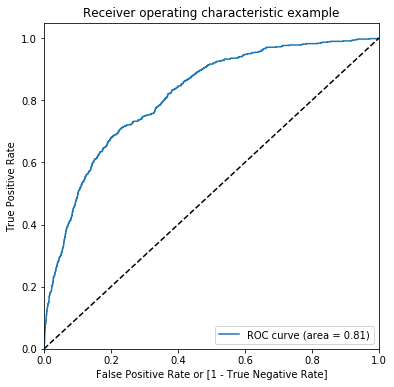

(array([0.        , 0.        , 0.        , ..., 0.99974529, 0.99987264,
        1.        ]),
 array([0.        , 0.00146199, 0.00292398, ..., 1.        , 1.        ,
        1.        ]),
 array([1.98242245, 0.98242245, 0.98174892, ..., 0.02342304, 0.02195262,
        0.01885993]))

In [173]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [174]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0    0.0    0.563363    1    1    1    1    1    1    0    0    0    0
1    0.0    0.784188    1    1    1    1    1    1    1    1    0    0
2    0.0    0.552649    1    1    1    1    1    1    0    0    0    0
3    0.0    0.281833    1    1    1    0    0    0    0    0    0    0
4    0.0    0.536064    1    1    1    1    1    1    0    0    0    0

In [175]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080131  1.000000  0.000000
0.1   0.1  0.188027  0.989766  0.118186
0.2   0.2  0.380740  0.970760  0.329343
0.3   0.3  0.525070  0.921053  0.490576
0.4   0.4  0.630272  0.834795  0.612455
0.5   0.5  0.696696  0.752924  0.691798
0.6   0.6  0.815487  0.634503  0.831253
0.7   0.7  0.879217  0.423977  0.918874
0.8   0.8  0.907802  0.250000  0.965104
0.9   0.9  0.920923  0.140351  0.988920


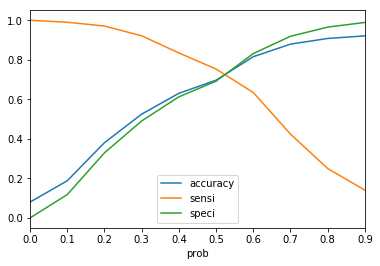

In [176]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [177]:
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.5313279771179078]


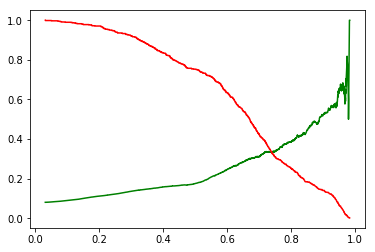

In [178]:
#Lets plot precision-recall curve as we are more interested in recall values
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred_final.churn,y_pred_final.churn_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [179]:
#As we are more interested in corrcetly predicting churners, we are choosign a recall value which 
#can predict significant number of churners. From the plot, I see that by choosing recall value as 0.37, 
#we can predict almost 86% of churners. Hence keeping 0.37 as our threshold.
y_pred_final['final_predicted'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.37 else 0)

y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0    0.0    0.563363    1    1    1    1    1    1    0    0    0    0   
1    0.0    0.784188    1    1    1    1    1    1    1    1    0    0   
2    0.0    0.552649    1    1    1    1    1    1    0    0    0    0   
3    0.0    0.281833    1    1    1    0    0    0    0    0    0    0   
4    0.0    0.536064    1    1    1    1    1    1    0    0    0    0   

   final_predicted  
0                1  
1                1  
2                1  
3                0  
4                1

In [180]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.6014526710402999

In [181]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[4544, 3308],
       [  94,  590]], dtype=int64)

In [182]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('Accuracy Score on test data: ', metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

#Precision
print('Precision Score: ',TP/(TP+FP))
      
#Recall
print('Recall: ', TP/(TP+FN))

Accuracy Score on test data:  0.6014526710402999
Sensitivity:  0.8625730994152047
Specificity:  0.5787060621497707
false postive rate:  0.4212939378502292
positive predictive value:  0.15135967162647512
Negative predictive value:  0.9797326433807676
Misclassification Rate:  0.3985473289597001
Precision Score:  0.15135967162647512
Recall:  0.8625730994152047


# DecisionTreeClassifier
with Principle Components selected by PCA

In [183]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [184]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.87      7852
         1.0       0.23      0.69      0.34       684

    accuracy                           0.79      8536
   macro avg       0.60      0.74      0.61      8536
weighted avg       0.91      0.79      0.83      8536



In [185]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6243 1609]
 [ 215  469]]
0.7863167760074976


In [186]:
confusion_dtree = confusion_matrix(y_test,y_pred_default)
TP = confusion_dtree[1,1] # true positive 
TN = confusion_dtree[0,0] # true negatives
FP = confusion_dtree[0,1] # false positives
FN = confusion_dtree[1,0] # false negatives

print('Acuracy Score', metrics.accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

#Precision
print('Precision Score: ',TP/(TP+FP))
      
#Recall
print('Recall: ', TP/(TP+FN))

Acuracy Score 0.7863167760074976
Sensitivity:  0.685672514619883
Specificity:  0.7950840550178299
false postive rate:  0.20491594498217014
positive predictive value:  0.22569778633301252
Negative predictive value:  0.9667079591204707
Misclassification Rate:  0.21368322399250234
Precision Score:  0.22569778633301252
Recall:  0.685672514619883


# Hyperparameter tuning - Decision Tree

In [187]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [188]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.040625      0.007658         0.003125        0.006250   
1       0.078120      0.000012         0.000000        0.000000   
2       0.109367      0.000002         0.003122        0.006244   
3       0.140619      0.000006         0.000000        0.000000   
4       0.174988      0.006257         0.003125        0.006250   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.920934           0.920934   
1               2  {'max_depth': 2}           0.921185           0.920934   
2               3  {'max_depth': 3}           0.921687           0.920683   
3               4  {'max_depth': 4}           0.922942           0.921185   
4               5  {'max_depth': 5}           0.921938           0.919930   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.921165           0.920914           0.920914         0.920972   
1           0.921667           0.920914           0.920914         0.921123   
2           0.922169           0.922169           0.921667         0.921675   
3           0.920914           0.922671           0.919659         0.921474   
4           0.921667           0.922420           0.921416         0.921474   

   std_test_score  rank_test_score  
0        0.000097                6  
1        0.000291                5  
2        0.000543                2  
3        0.001207                4  
4        0.000841                3

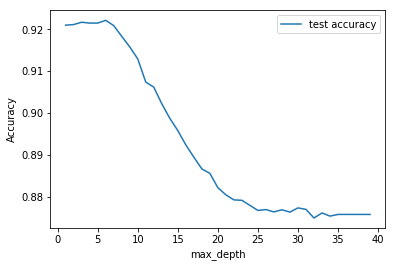

In [189]:
# plotting accuracies with max_depth
plt.figure()
#plt.plot(scores["param_max_depth"], 
#         scores["mean_train_score"], 
#         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [190]:
#Max depth should be in 5-10

In [191]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [192]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.374979      0.029648         0.003121        0.006241   
1       0.303111      0.007663         0.006247        0.007651   
2       0.290613      0.007637         0.000000        0.000000   
3       0.265599      0.013958         0.003125        0.006250   
4       0.256236      0.012497         0.006246        0.007650   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.822289   
1                     25  {'min_samples_leaf': 25}           0.736195   
2                     45  {'min_samples_leaf': 45}           0.729418   
3                     65  {'min_samples_leaf': 65}           0.745231   
4                     85  {'min_samples_leaf': 85}           0.735944   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.822289           0.820487           0.831785           0.832036   
1           0.728414           0.740648           0.752699           0.736631   
2           0.733434           0.746422           0.731107           0.735124   
3           0.731426           0.758474           0.729852           0.735124   
4           0.735944           0.737133           0.704996           0.741401   

   mean_test_score  std_test_score  rank_test_score  
0         0.825777        0.005051                1  
1         0.738917        0.007949                3  
2         0.735101        0.005987                4  
3         0.740021        0.010667                2  
4         0.731084        0.013197                7

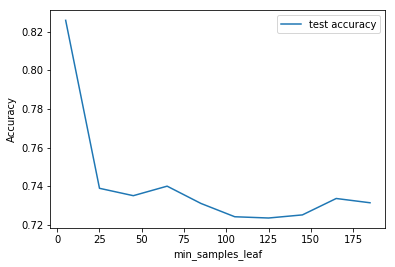

In [193]:
# plotting accuracies with min_samples_leaf
plt.figure()
#plt.plot(scores["param_min_samples_leaf"], 
#         scores["mean_train_score"], 
#         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [194]:
#optimal min_samples_leaf=25

In [195]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [196]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.378091      0.024991         0.000000         0.00000   
1       0.353101      0.007662         0.003125         0.00625   
2       0.346852      0.015308         0.003125         0.00625   
3       0.337478      0.007654         0.003125         0.00625   
4       0.331227      0.011697         0.000000         0.00000   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.863203   
1                      25  {'min_samples_split': 25}           0.801707   
2                      45  {'min_samples_split': 45}           0.767319   
3                      65  {'min_samples_split': 65}           0.748996   
4                      85  {'min_samples_split': 85}           0.743976   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.869980           0.876726           0.872207           0.877730   
1           0.796436           0.808436           0.804921           0.805925   
2           0.767068           0.772282           0.785589           0.772784   
3           0.755773           0.763495           0.767261           0.761988   
4           0.752008           0.761737           0.752699           0.754456   

   mean_test_score  std_test_score  rank_test_score  
0         0.871969        0.005228                1  
1         0.803485        0.004132                2  
2         0.773009        0.006730                3  
3         0.759503        0.006428                4  
4         0.752975        0.005674                5

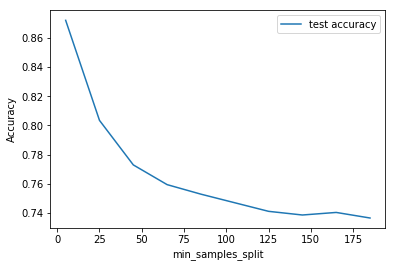

In [197]:
# plotting accuracies with min_samples_split
plt.figure()
#plt.plot(scores["param_min_samples_split"], 
#         scores["mean_train_score"], 
#         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [198]:
#optimal min_samples_split=25

In [199]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 15, 5),
    'min_samples_leaf': range(5,1000, 200),
    'min_samples_split': range(5, 1000, 200),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [200]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.074997      0.011692         0.003125         0.00625   
1       0.071870      0.007662         0.003125         0.00625   
2       0.071867      0.007658         0.000000         0.00000   
3       0.074998      0.006244         0.000000         0.00000   
4       0.068748      0.007652         0.000000         0.00000   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               1                      5   
1         entropy               1                      5   
2         entropy               1                      5   
3         entropy               1                      5   
4         entropy               1                      5   

  param_min_samples_split                                             params  \
0                       5  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
1                     205  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
2                     405  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
3                     605  {'criterion': 'entropy', 'max_depth': 1, 'min_...   
4                     805  {'criterion': 'entropy', 'max_depth': 1, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.551707           0.569528           0.569169           0.556113   
1           0.551707           0.569528           0.569169           0.556113   
2           0.551707           0.569528           0.569169           0.556113   
3           0.551707           0.569528           0.569169           0.556113   
4           0.551707           0.569528           0.569169           0.556113   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.547075         0.558718        0.009139              101  
1           0.547075         0.558718        0.009139              101  
2           0.547075         0.558718        0.009139              101  
3           0.547075         0.558718        0.009139              101  
4           0.547075         0.558718        0.009139              101

In [201]:
# printing the optimal accuracy score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.7699458390932548
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


We see that after creating Decision Tree model using optimal parameters got as a part of above step, we get recall score of 77% which is not a good score to predict high valued customers.
To increase this recal value, we have chosen such a value of hyper parameters through our above 'cv_results' matrix that our model is able to predict significant percentage of churned customers.

In [202]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=11, 
                                  min_samples_leaf=800,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=11, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=800,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')

In [203]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_T=confusion_matrix(y_test,y_pred_default)
confusion_tree_T

array([[5217, 2635],
       [ 134,  550]], dtype=int64)

In [205]:
TP = confusion_tree_T[1,1] # true positive 
TN = confusion_tree_T[0,0] # true negatives
FP = confusion_tree_T[0,1] # false positives
FN = confusion_tree_T[1,0] # false negatives

print('Acuracy Score', metrics.accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

#Precision
print('Precision Score: ',TP/(TP+FP))
      
#Recall
print('Recall: ', TP/(TP+FN))

Acuracy Score 0.9213917525773195
Sensitivity:  0.804093567251462
Specificity:  0.6644167091186959
false postive rate:  0.3355832908813041
positive predictive value:  0.1726844583987441
Negative predictive value:  0.9749579517847131
Misclassification Rate:  0.3243908153701968
Precision Score:  0.1726844583987441
Recall:  0.804093567251462


# RandomForestClassifier with PCA

In [212]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [213]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7779,   73],
       [ 590,   94]], dtype=int64)

In [214]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

#Precision
print('Precision Score: ',TP/(TP+FP))
      
#Recall
print('Recall: ', TP/(TP+FN))

Sensitivity:  0.13742690058479531
Specificity:  0.9907030056036679
false postive rate:  0.009296994396332145
positive predictive value:  0.562874251497006
Negative predictive value:  0.9295017325845382
Misclassification Rate:  0.07767104029990628
Precision Score:  0.562874251497006
Recall:  0.13742690058479531


# Hyperparameter tuning for RandomForest

In [216]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_pca = RandomForestClassifier(class_weight='balanced', random_state=42)


# fit tree on training data
rf_pca = GridSearchCV(rf_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [217]:
# scores of GridSearch CV
scores = rf_pca.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.824808      0.030296         0.096871    6.249380e-03   
1       7.468534      0.485774         0.124992    9.416779e-07   
2      10.475154      0.555264         0.153116    1.169077e-02   
3       9.909581      0.472555         0.156241    1.397372e-02   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.705823           0.704819   
1               7   {'max_depth': 7}           0.798695           0.797440   
2              12  {'max_depth': 12}           0.881275           0.875000   
3              17  {'max_depth': 17}           0.911396           0.910894   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.722822           0.702988           0.708260         0.708942   
1           0.801155           0.791614           0.799397         0.797660   
2           0.874466           0.871956           0.875722         0.875684   
3           0.909616           0.908109           0.912378         0.910478   

   std_test_score  rank_test_score  
0        0.007146                4  
1        0.003253                3  
2        0.003070                2  
3        0.001482                1

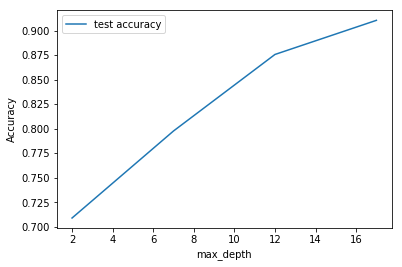

In [218]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [219]:
#max_depth should be 12

In [223]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=12, class_weight='balanced', random_state=42)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                              

In [224]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.236809      0.313322         0.171864        0.019763   
1      49.658723      0.594647         0.749950        0.017115   
2      87.450683      0.235147         1.340535        0.030296   
3     123.520083     12.816437         2.086096        0.674936   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.520635   
1                500   {'n_estimators': 500}           0.517460   
2                900   {'n_estimators': 900}           0.517460   
3               1300  {'n_estimators': 1300}           0.514286   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.523810           0.452229           0.488889           0.517460   
1           0.517460           0.455414           0.488889           0.517460   
2           0.520635           0.458599           0.485714           0.511111   
3           0.526984           0.458599           0.485714           0.507937   

   mean_test_score  std_test_score  rank_test_score  
0         0.500605        0.027207                1  
1         0.499337        0.024592                2  
2         0.498704        0.023511                3  
3         0.498704        0.024104                4

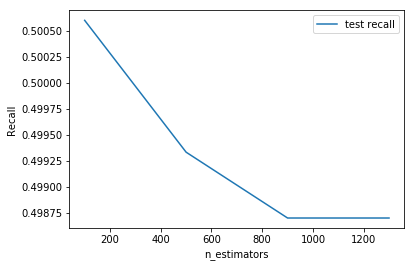

In [226]:
# plotting accuracies with n_estimators
plt.figure()
#plt.plot(scores["param_n_estimators"], 
#         scores["mean_train_score"], 
#         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [ ]:
#estimator -200

In [227]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [228]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.858776      0.154354         0.174990    2.499827e-02   
1       7.949465      0.209482         0.156240    9.880764e-03   
2       7.568235      0.239733         0.190610    5.710826e-02   
3       6.681947      0.171928         0.212480    2.724656e-02   
4       6.193329      0.324526         0.124992    9.887906e-07   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.774603   
1                    150  {'min_samples_leaf': 150}           0.784127   
2                    200  {'min_samples_leaf': 200}           0.796825   
3                    250  {'min_samples_leaf': 250}           0.793651   
4                    300  {'min_samples_leaf': 300}           0.793651   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.768254           0.735669           0.663492           0.701587   
1           0.780952           0.738854           0.663492           0.707937   
2           0.777778           0.745223           0.666667           0.720635   
3           0.784127           0.742038           0.685714           0.714286   
4           0.774603           0.742038           0.685714           0.717460   

   mean_test_score  std_test_score  rank_test_score  
0         0.728721        0.041731                6  
1         0.735072        0.045576                5  
2         0.741426        0.045664                4  
3         0.743963        0.040889                2  
4         0.742693        0.038726                3

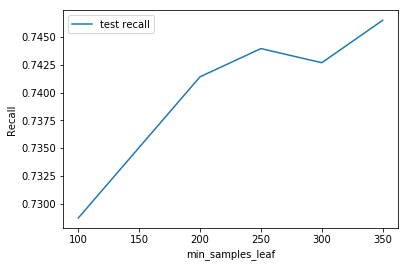

In [229]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()


In [ ]:
#optimal min_samples_leaf = 350

In [231]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',random_state=42)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [232]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.218634      0.385116         0.096875        0.006254   
1       5.640530      0.532076         0.106247        0.006251   
2       5.475606      0.390601         0.096865        0.006250   
3       5.109021      0.100298         0.093752        0.000008   
4       4.912478      0.096993         0.093745        0.000011   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.733333   
1                     250  {'min_samples_split': 250}           0.749206   
2                     300  {'min_samples_split': 300}           0.758730   
3                     350  {'min_samples_split': 350}           0.774603   
4                     400  {'min_samples_split': 400}           0.774603   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.736508           0.697452           0.650794           0.650794   
1           0.736508           0.729299           0.657143           0.663492   
2           0.755556           0.716561           0.653968           0.682540   
3           0.758730           0.738854           0.666667           0.695238   
4           0.768254           0.732484           0.660317           0.695238   

   mean_test_score  std_test_score  rank_test_score  
0         0.693776        0.037681                6  
1         0.707130        0.038802                5  
2         0.713471        0.040808                4  
3         0.726818        0.040155                1  
4         0.726179        0.043474                3

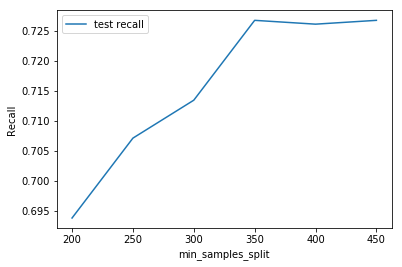

In [233]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()



In [ ]:
#optimal min_samples_split=350

In [234]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=12,class_weight='balanced', random_state=42)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                              

In [237]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      13.889558      0.668951         0.167541        0.008185   
1      22.317916      2.685957         0.140622        0.019972   
2       0.163385      0.004038         0.000000        0.000000   
3       0.165046      0.005313         0.000000        0.000000   
4       0.163404      0.004088         0.000000        0.000000   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.511111   
1                  8   {'max_features': 8}           0.523810   
2                 14  {'max_features': 14}                NaN   
3                 20  {'max_features': 20}                NaN   
4                 24  {'max_features': 24}                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.533333           0.471338           0.495238           0.526984   
1           0.517460           0.461783           0.492063           0.523810   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  
0         0.507601        0.022441                1  
1         0.503785        0.024044                2  
2              NaN             NaN                3  
3              NaN             NaN                4  
4              NaN             NaN                5

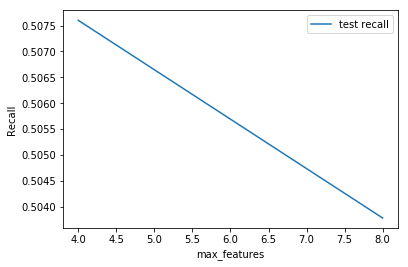

In [236]:
#Plot for max features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [ ]:
#optimal max_features = 8

In [239]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,20],
    'min_samples_leaf': range(100, 1000, 100),
    'min_samples_split': range(10, 1000, 100),
    'n_estimators': range(1, 200, 100), 
    'max_features': [2,4,6,8,10,12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score',
                         cv = 5, verbose = 1)

In [221]:
#Commenting out tuning as it takes a lot of time to run.

In [241]:
# Fit the grid search to the data
#grid_search.fit(df_train_pca, y_train)

In [225]:
# printing the optimal recall score and hyperparameters
#print('Recall : ',grid_search.best_score_,'Parameters',grid_search.best_params_)

We see that after creating Random Forest Model using optimal parameters got as a part of above step, we get recall score of 79% which is not a good score to predict high valued customers.
To increase this recall value, we have chosen such a value of hyper parameters that our model is able to predict significant percentage of churned customers.
We have chosen these values after creating multiple models.

In [372]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion= 'entropy',
                             max_depth=14,
                             min_samples_leaf=800, 
                             min_samples_split=200,
                             max_features=8, min_impurity_split=1,random_state=10,
                             n_estimators=200)

In [373]:
#fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=14, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=1,
                       min_samples_leaf=800, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [374]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [375]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

         0.0       0.97      0.41      0.58      7852
         1.0       0.12      0.88      0.20       684

    accuracy                           0.45      8536
   macro avg       0.55      0.65      0.39      8536
weighted avg       0.91      0.45      0.55      8536

[[3236 4616]
 [  83  601]]
accuracy_score:   0.44950796626054357


In [376]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper  

array([[3236, 4616],
       [  83,  601]], dtype=int64)

In [377]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',metrics.accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

#Precision
print('Precision Score: ',TP/(TP+FP))
      
#Recall
print('Recall: ', TP/(TP+FN))


Accuracy Score:   0.44950796626054357
Sensitivity:  0.8786549707602339
Specificity:  0.4121242995415181
false postive rate:  0.5878757004584819
positive predictive value:  0.1152003066896684
Negative predictive value:  0.9749924676107261
Misclassification Rate:  0.5504920337394564
Precision Score:  0.1152003066896684
Recall:  0.8786549707602339


# Summary

**Interpretable Model**
------------------------------------------------------------------
**Logistic regression with RFE (15 features)**
------------------------------------------------------------------------

- Accuracy Score :  0.814784442361762
- Sensitivity:  0.8245614035087719
- Specificity:  0.8215741212429954
- false postive rate:  0.17842587875700458
- positive predictive value:  0.2870229007633588
- Negative predictive value:  0.9817379394308324
- Precision Score:  0.279390063944909
- **Recall Score:  0.8304093567251462**

------------------------------------------------------------------

**Predictable Models** - (After Dimensionality Reduction using PCA)
------------------------------------------------------------------
**Logistic Regression**
-----------------------------------------------------------------------

- Accuracy Score on test data:  0.6014526710402999
- Sensitivity:  0.8625730994152047
- Specificity:  0.5787060621497707
- false postive rate:  0.4212939378502292
- positive predictive value:  0.15135967162647512
- Negative predictive value:  0.9797326433807676
- Misclassification Rate:  0.3985473289597001
- Precision Score:  0.15135967162647512
- **Recall:  0.8625730994152047**

-------------------------------------------------------------------------------
Decision Tree - Default Parameters
--------------------------------------------------------------------------------------
- Acuracy Score 0.7863167760074976
- Sensitivity:  0.685672514619883
- Specificity:  0.7950840550178299
- false postive rate:  0.20491594498217014
- positive predictive value:  0.22569778633301252
- Negative predictive value:  0.9667079591204707
- Misclassification Rate:  0.21368322399250234
- Precision Score:  0.22569778633301252
- Recall:  0.685672514619883

-------------------------------------------------------------------------------
Decision Tree - After tuning Hyper Parameters
--------------------------------------------------------------------------------------
- Acuracy Score 0.6756091846298032
- Sensitivity:  0.804093567251462
- Specificity:  0.6644167091186959
- false postive rate:  0.3355832908813041
- positive predictive value:  0.1726844583987441
- Negative predictive value:  0.9749579517847131
- Misclassification Rate:  0.3243908153701968
- Precision Score:  0.1726844583987441
- **Recall:  0.804093567251462**

-------------------------------------------------------------------------------
Random Forest - Default Parameters
--------------------------------------------------------------------------------------
- Sensitivity:  0.13596491228070176
- Specificity:  0.9896841569027
- false postive rate:  0.010315843097300052
- positive predictive value:  0.5344827586206896
- Negative predictive value:  0.9293231284381727
- Misclassification Rate:  0.07872539831302718
- Precision Score:  0.5344827586206896
- Recall:  0.13596491228070176


-------------------------------------------------------------------------------
Random Forest - After tuning Hyper Parameters
--------------------------------------------------------------------------------------
- Accuracy Score:   0.44950796626054357
- Sensitivity:  0.8786549707602339
- Specificity:  0.4121242995415181
- false postive rate:  0.5878757004584819
- positive predictive value:  0.1152003066896684
- Negative predictive value:  0.9749924676107261
- Misclassification Rate:  0.5504920337394564
- Precision Score:  0.1152003066896684
- **Recall:  0.8786549707602339**

As it is more important to identify churners than the non-churners accurately, so we had decided to use recall as an evaluation metric while creating models.

Also, from different evaluation scores we see that:
- We should use **Logistic Regression with RFE(Recall = 0.83)** to explain important features to Business.
- And should use **Random Forest after PCA and with tuned hyperparameter(Recall = 0.88)** to predict churners.

# Most Important Features Selected by Model

**Postitive Predictors**
- Feature Name      : Coeff
- roam_og_mou_8     : 7.11 
- std_og_mou_6      : 4.58
- total_rech_data_6 : 2.67

**Negative Predictors**
- arpu_8              : -16.34
- spl_og_mou_8        : -3.02
- loc_ic_mou_6        : -2.03
- spl_ic_mou_8        : -6.82
- date_of_last_rech_8 : -1.98
- last_day_rch_amt_8  : -10.77
- total_rech_data_8   : -12.0
- monthly_2g_8        : -5.3
- aug_vbc_3g          : -7.7

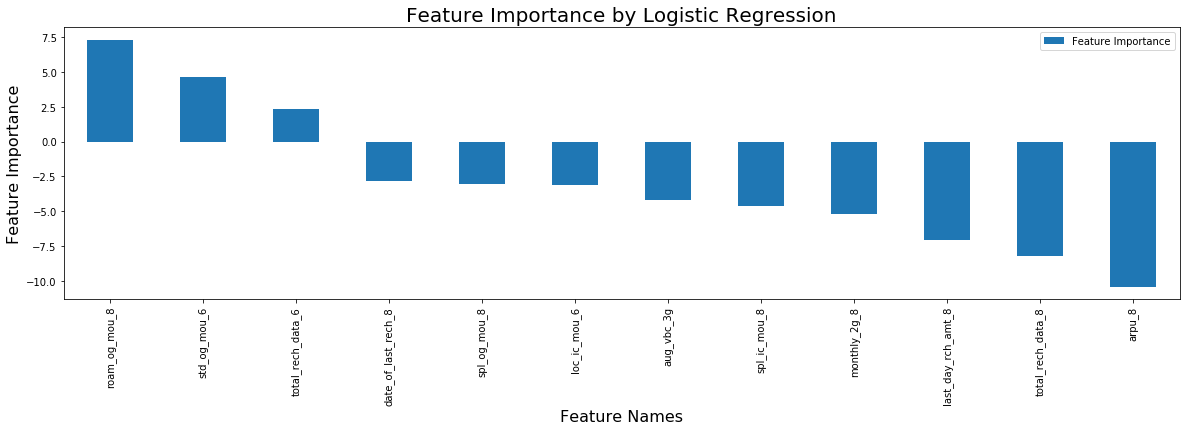

In [378]:
#Plot most important features selected by Interpretable Model(Logistic Regression):
important_features.sort_values(by='Feature Importance',ascending=False).plot(figsize=(20,5), kind='bar')
plt.title('Feature Importance by Logistic Regression', fontsize=20)
plt.xlabel('Feature Names', fontsize=16)
plt.ylabel('Feature Importance', fontsize=16)
plt.show()

# Recommendations to Business

1. Based on our analysis, we can say that a drop in usage of the services provided by telecom provider in action phase as compared to good pahse is a clear indicator of churn.
2. If there is an increase in outgoing calls from roaming zone, then there are high chances of customer doing churn. As it indicates that customer has moved to roaming area and will definitely use different service provider.
3. If there is a significant drop in total recharge(data+amt) done by the customers from good phase to action phase, there are high chances of customer getting churn. 
4. Special outgoing calls and decrease in average revenue of customer are strong indicators of churn.
5. if a customer has suddenly stopped taking any service and just paying for volume based cost, that is a very strong indicator of churn.
6. If recharge was done a long time back, that also shows high probability of customer going to churn.
